In [14]:
import pandas as pd


In [15]:
import numpy as np

In [16]:
df_gp=pd.read_csv('C:/Users/Manish/Downloads/googleplaystore.csv/googleplaystore.csv')

In [17]:
df_gpur=pd.read_csv("C:/Users/Manish/Downloads/archive/googleplaystore_user_reviews.csv")

In [18]:
df_as=pd.read_csv("C:/Users/Manish/Downloads/archive (1)/AppleStore.csv")

In [19]:
df_asd=pd.read_csv("C:/Users/Manish/Downloads/archive (1)/appleStore_description.csv")

In [93]:
playstore=pd.read_csv('C:/Users/Manish/Downloads/googleplaystore.csv/googleplaystore.csv')

In [94]:
user_reviews =pd.read_csv("C:/Users/Manish/Downloads/archive/googleplaystore_user_reviews.csv")

In [95]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('C:/Users/Manish/Downloads/archive'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/Manish/Downloads/archive\googleplaystore.csv
C:/Users/Manish/Downloads/archive\googleplaystore_user_reviews.csv
C:/Users/Manish/Downloads/archive\license.txt


In [96]:
threshold = len(playstore) * 0.05
cols_to_drop = playstore.columns[playstore.isna().sum() <= threshold]
playstore.dropna(subset=cols_to_drop,inplace=True)

In [97]:
playstore['Last Updated'] = pd.to_datetime(playstore['Last Updated'])

playstore['Installs'] = playstore['Installs'].str.replace(r'[,+]', '', regex=True)
playstore['Installs'] = playstore['Installs'].astype('int')

playstore['Reviews'] = playstore['Reviews'].astype('int')


def clean_price(price):
    if price[0] == '$':
        return float(price[1:]) if price[1:] != '0' else 0.0
    return float(price)
    
playstore['Price'] = playstore['Price'].astype(str)

playstore['Price'] = playstore['Price'].apply(clean_price)


In [98]:
playstore.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                    int64
Size                      object
Installs                   int64
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object

In [99]:
user_reviews.dropna(subset=['Sentiment'],inplace = True)

In [100]:
user_reviews.dropna(inplace= True)
user_reviews.isna().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [101]:
col = ['App','Size','Type','Genres']
playstore.drop_duplicates(subset=col , keep='first',inplace = True)

In [20]:
df_gp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [111]:
import math 

%matplotlib inline

In [112]:
apps=pd.read_csv("C:/Users/Manish/Downloads/archive (1)/AppleStore.csv")

In [113]:
apps['size_bytes'] = apps['size_bytes'] / 1000000
apps.rename(columns={'size_bytes':'size_mb'}, inplace=True)
apps.head(5)

,Unnamed: 0,id,track_name,size_mb,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100.788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158.578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100.524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128.512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92.774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [114]:
genres = apps['prime_genre'].unique()
print("Total genres : {}".format(len(genres)))
print(genres)

Total genres : 23
['Games' 'Productivity' 'Weather' 'Shopping' 'Reference' 'Finance' 'Music'
 'Utilities' 'Travel' 'Social Networking' 'Sports' 'Business'
 'Health & Fitness' 'Entertainment' 'Photo & Video' 'Navigation'
 'Education' 'Lifestyle' 'Food & Drink' 'News' 'Book' 'Medical' 'Catalogs']


In [115]:
freeapps = apps[apps.price == 0.0]
paidapps = apps[apps.price != 0.0]

print("Free apps : ",len(freeapps))
print("Paid apps : ",len(paidapps))

Free apps :  4056
Paid apps :  3141


In [21]:
df_gp.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [22]:
df_gp.shape

(10841, 13)

In [23]:
df_gp[10472:10473]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [24]:
id = 10472
df_new_gp = df_gp.drop(id)
print("Google Paly:", df_new_gp.shape)

Google Paly: (10840, 13)


In [25]:
app_counts = df_new_gp['App'].value_counts()


In [26]:
duplicate_apps = app_counts[app_counts > 1]


In [27]:
total_duplicates = app_counts[app_counts > 1].sum() - len(app_counts[app_counts > 1])


In [28]:
print("Number of duplicate apps:", total_duplicates)

Number of duplicate apps: 1181


In [29]:
duplicate_rows = df_new_gp[df_new_gp.duplicated(subset='App', keep=False)]


In [30]:
grouped_duplicates = duplicate_rows.groupby('App')

In [31]:
selected_groups = list(grouped_duplicates)

In [32]:
for group in selected_groups:
    print(f"App: {group[0]}")
    print(group[1]) 
    print()

App: 10 Best Foods for You
                        App            Category  Rating Reviews  Size  \
1393  10 Best Foods for You  HEALTH_AND_FITNESS     4.0    2490  3.8M   
1407  10 Best Foods for You  HEALTH_AND_FITNESS     4.0    2490  3.8M   

      Installs  Type Price Content Rating            Genres  \
1393  500,000+  Free     0   Everyone 10+  Health & Fitness   
1407  500,000+  Free     0   Everyone 10+  Health & Fitness   

           Last Updated Current Ver   Android Ver  
1393  February 17, 2017         1.9  2.3.3 and up  
1407  February 17, 2017         1.9  2.3.3 and up  

App: 1800 Contacts - Lens Store
                             App Category  Rating Reviews Size    Installs  \
2322  1800 Contacts - Lens Store  MEDICAL     4.7   23160  26M  1,000,000+   
2543  1800 Contacts - Lens Store  MEDICAL     4.7   23160  26M  1,000,000+   

      Type Price Content Rating   Genres   Last Updated Current Ver  \
2322  Free     0       Everyone  Medical  July 27, 2018       7.4.1 

In [33]:
df_new_gp2 = (
    df_new_gp
    .sort_values(by='Reviews', ascending=False) 
    .drop_duplicates(subset='App', keep='first') 
)
df_new_gp2.shape

(9659, 13)

In [34]:
import re
pattern = r'^[\w\s.,!?;+*-_/()\[\]{}@#%&]+$'
df_gp_non_english = df_new_gp2[df_new_gp2['App'].str.match(pattern)]
df_gp_non_english.shape

(9055, 13)

In [35]:
print("App Store:", df_as.shape)
df_as.head(2)

App Store: (7197, 17)


,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1


In [36]:
app_counts = df_as['track_name'].value_counts()

In [37]:
duplicate_apps = app_counts[app_counts > 1]

In [38]:
total_duplicates = app_counts[app_counts > 1].sum() - len(app_counts[app_counts > 1])

print("Number of duplicate apps:", total_duplicates)

Number of duplicate apps: 2


In [39]:
duplicate_rows = df_as[df_as.duplicated(subset='track_name', keep=False)]

In [40]:
grouped_duplicates = duplicate_rows.groupby('track_name')

In [41]:
for name, group in grouped_duplicates:
    print(f"App: {name}")
    print(group)
    print()

App: Mannequin Challenge
      Unnamed: 0          id           track_name  size_bytes currency  price  \
7092       10751  1173990889  Mannequin Challenge   109705216      USD    0.0   
7128       10885  1178454060  Mannequin Challenge    59572224      USD    0.0   

      rating_count_tot  rating_count_ver  user_rating  user_rating_ver    ver  \
7092               668                87          3.0              3.0    1.4   
7128               105                58          4.0              4.5  1.0.1   

     cont_rating prime_genre  sup_devices.num  ipadSc_urls.num  lang.num  \
7092          9+       Games               37                4         1   
7128          4+       Games               38                5         1   

      vpp_lic  
7092        1  
7128        1  

App: VR Roller Coaster
      Unnamed: 0          id         track_name  size_bytes currency  price  \
3319        4000   952877179  VR Roller Coaster   169523200      USD    0.0   
5603        7579  1089824278

In [42]:
df_as2 = (
    df_as
    .sort_values(by='rating_count_tot', ascending=False) 
    .drop_duplicates(subset='track_name', keep='first') 
)
df_as2.shape

(7195, 17)

In [43]:
pattern = r'^[\w\s.,!?;+*-_/()\[\]{}@#%&]+$'
df_as_non_english = df_as2[df_as2['track_name'].str.match(pattern)]
df_as_non_english.shape

(6186, 17)

In [44]:
df_gpur.shape

(64295, 5)

In [45]:
df_gpur.head(2)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462


In [46]:
df_gpur.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [47]:
df_gpur_non=df_gpur.dropna()

In [48]:
df_gpur_non.shape


(37427, 5)

In [49]:
df_gpur_non['Sentiment'].value_counts()

Sentiment
Positive    23998
Negative     8271
Neutral      5158
Name: count, dtype: int64

In [50]:
df_gpur_non.Sentiment=[0 if i=="Positive" else 1 if i=="Negative" else 2 for i in df_gpur_non.Sentiment]

In [51]:
df_gpur_non.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,0,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,0,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,0,0.40,0.875000
4,10 Best Foods for You,Best idea us,0,1.00,0.300000
5,10 Best Foods for You,Best way,0,1.00,0.300000


In [52]:
df_gpur_non.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,0,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",0,0.225000,0.447222
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",1,-0.287500,0.250000
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,0,0.800000,1.000000
64230,Housing-Real Estate & Property,"Useless app, I searched flats kondapur, Hydera...",1,-0.316667,0.400000


In [53]:
df_asd.isnull().sum()

id            0
track_name    0
size_bytes    0
app_desc      0
dtype: int64

In [54]:
df_asd.head(2)

,id,track_name,size_bytes,app_desc
0,281656475,PAC-MAN Premium,100788224,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,281796108,Evernote - stay organized,158578688,Let Evernote change the way you organize your ...


In [55]:
df_asd.shape

(7197, 4)

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
from wordcloud import WordCloud
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [58]:
df_new_gp2['Last Updated'] = pd.to_datetime(df_new_gp2['Last Updated'])
df_new_gp2['Last Updated']

2989   2018-05-23
4970   2013-12-17
2723   2018-01-22
3079   2018-06-05
3229   2018-08-06
          ...    
2465   2018-07-31
9925   2015-09-24
9928   2016-12-01
9929   2017-04-18
7101   2016-08-19
Name: Last Updated, Length: 9659, dtype: datetime64[ns]

In [59]:
df_new_gp2['Updated_Day']=df_new_gp2['Last Updated'].dt.day
df_new_gp2['Updated_Month']=df_new_gp2['Last Updated'].dt.month
df_new_gp2['Updated_Year']=df_new_gp2['Last Updated'].dt.year

In [60]:
df_new_gp2.drop('Last Updated', axis=1, inplace=True)

In [61]:
df_new_gp2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Updated_Day,Updated_Month,Updated_Year
2989,GollerCepte Live Score,SPORTS,4.2,9992,31M,"1,000,000+",Free,0,Everyone,Sports,6.5,4.1 and up,23,5,2018
4970,Ad Block REMOVER - NEED ROOT,TOOLS,3.3,999,91k,"100,000+",Free,0,Everyone,Tools,3.2,2.2 and up,17,12,2013
2723,SnipSnap Coupon App,SHOPPING,4.2,9975,18M,"1,000,000+",Free,0,Everyone,Shopping,1.4,4.3 and up,22,1,2018
3079,US Open Tennis Championships 2018,SPORTS,4.0,9971,33M,"1,000,000+",Free,0,Everyone,Sports,7.1,5.0 and up,5,6,2018
3229,DreamTrips,TRAVEL_AND_LOCAL,4.7,9971,22M,"500,000+",Free,0,Teen,Travel & Local,1.28.1,5.0 and up,6,8,2018


In [62]:
df_new_gp2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 2989 to 7101
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   object 
 4   Size            9659 non-null   object 
 5   Installs        9659 non-null   object 
 6   Type            9658 non-null   object 
 7   Price           9659 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Current Ver     9651 non-null   object 
 11  Android Ver     9657 non-null   object 
 12  Updated_Day     9659 non-null   int32  
 13  Updated_Month   9659 non-null   int32  
 14  Updated_Year    9659 non-null   int32  
dtypes: float64(1), int32(3), object(11)
memory usage: 1.1+ MB


In [64]:
num_features=[col for col in df_new_gp2.columns if df_new_gp2[col].dtype!='O']
num_features

['Rating', 'Updated_Day', 'Updated_Month', 'Updated_Year']

In [65]:
num_data = df_new_gp2[num_features]
num_data.head()

,Rating,Updated_Day,Updated_Month,Updated_Year
2989,4.2,23,5,2018
4970,3.3,17,12,2013
2723,4.2,22,1,2018
3079,4.0,5,6,2018
3229,4.7,6,8,2018


In [66]:
cat_features=[col for col in df_new_gp2.columns if df_new_gp2[col].dtype=='O']
cat_features

['App',
 'Category',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Genres',
 'Current Ver',
 'Android Ver']

In [67]:
categorical=df_new_gp2[cat_features]
categorical.head()

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver
2989,GollerCepte Live Score,SPORTS,9992,31M,"1,000,000+",Free,0,Everyone,Sports,6.5,4.1 and up
4970,Ad Block REMOVER - NEED ROOT,TOOLS,999,91k,"100,000+",Free,0,Everyone,Tools,3.2,2.2 and up
2723,SnipSnap Coupon App,SHOPPING,9975,18M,"1,000,000+",Free,0,Everyone,Shopping,1.4,4.3 and up
3079,US Open Tennis Championships 2018,SPORTS,9971,33M,"1,000,000+",Free,0,Everyone,Sports,7.1,5.0 and up
3229,DreamTrips,TRAVEL_AND_LOCAL,9971,22M,"500,000+",Free,0,Teen,Travel & Local,1.28.1,5.0 and up


In [68]:
categorical['Category'].value_counts()

Category
FAMILY                 1877
GAME                    943
TOOLS                   828
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           164
MAPS_AND_NAVIGATION     131
FOOD_AND_DRINK          112
EDUCATION               108
ENTERTAINMENT            86
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           73
EVENTS                   64
ART_AND_DESIGN           61
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: count, dtype: int64

In [71]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [72]:
google_category_counts = df_gp_non_english['Category'].value_counts(normalize=True)


In [73]:
print(google_category_counts.shape)

(33,)


In [74]:
top10_google_category_categories = google_category_counts.head(10)

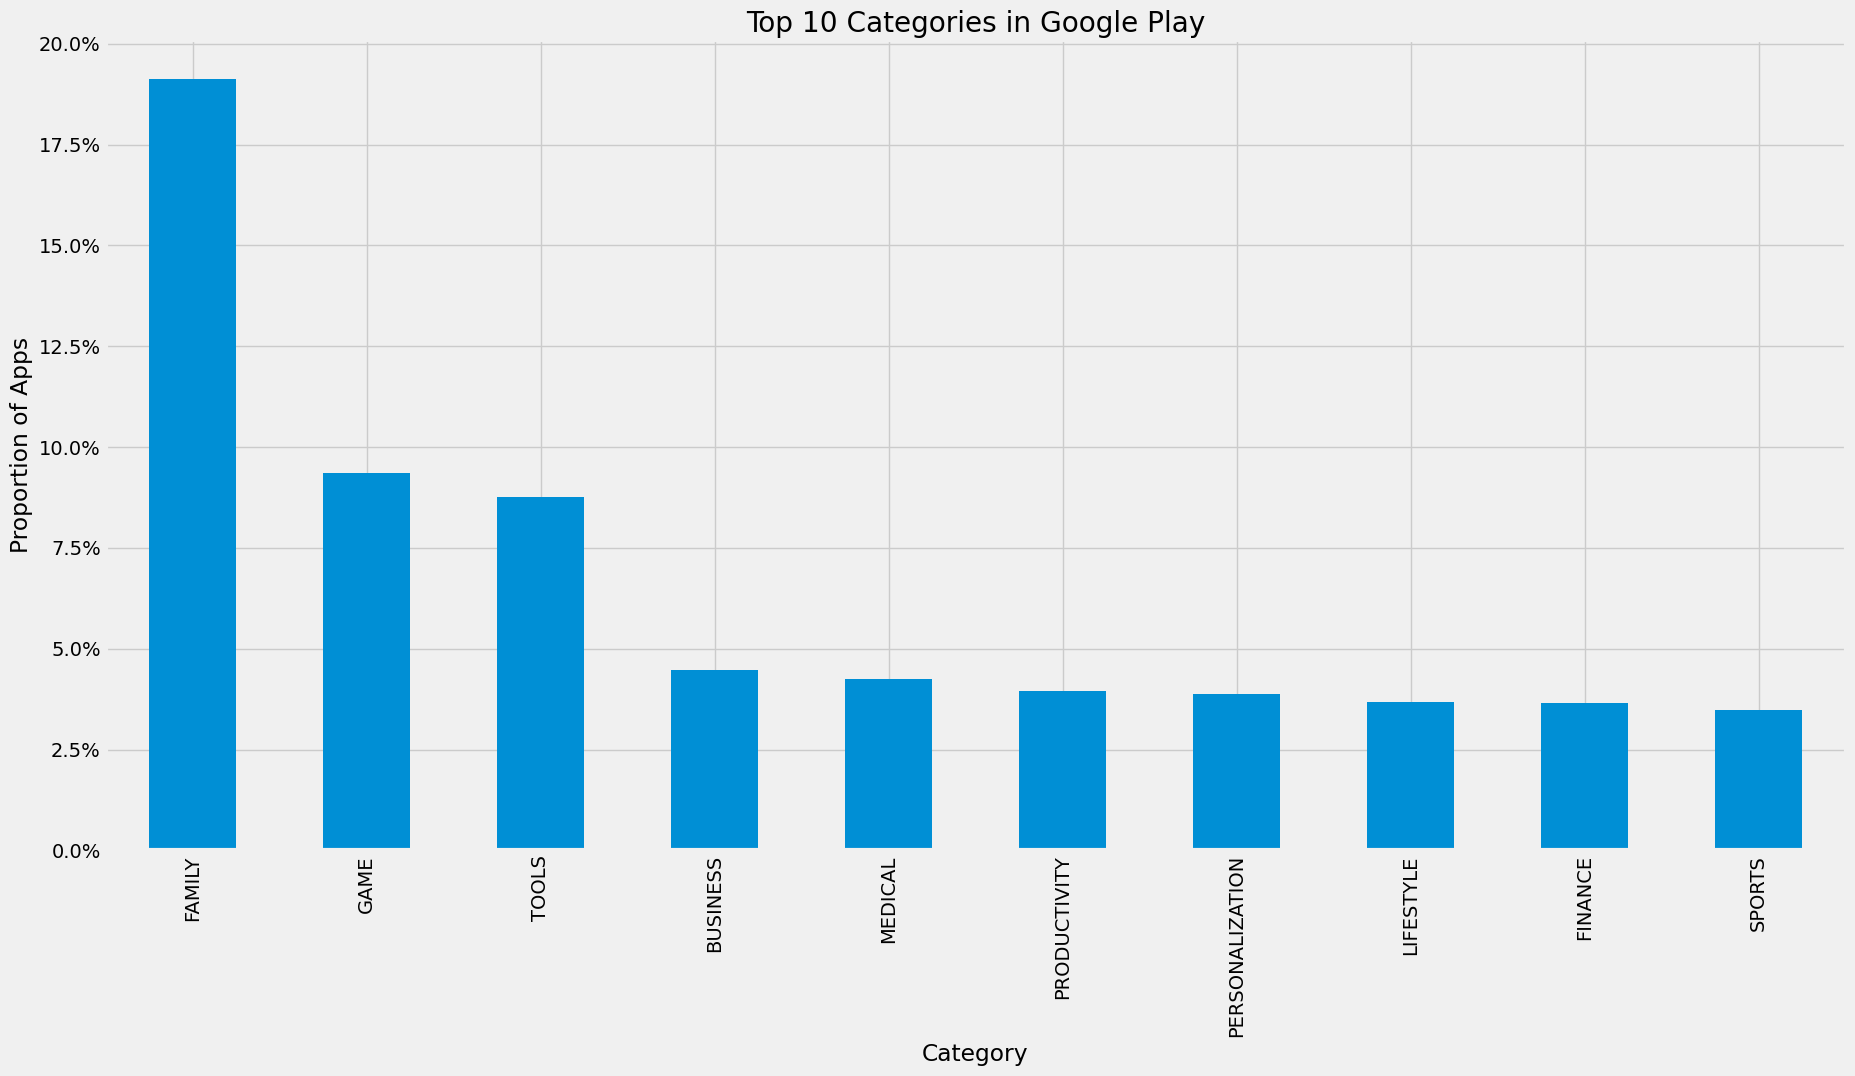

In [77]:
top10_google_category_categories.plot(kind='bar')
plt.title('Top 10 Categories in Google Play')
plt.ylabel('Proportion of Apps')
plt.xlabel('Category')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.show()

In [79]:
family_apps =df_gp_non_english[df_gp_non_english['Category'] == 'FAMILY']
family_apps_sorted = family_apps.sort_values(by='Installs', ascending=False)
top_10_family_apps = family_apps_sorted.head(10)
print(top_10_family_apps)

                                                App Category  Rating Reviews  \
4689                             Mod GTA V for MCPE   FAMILY     3.3    4288   
2151                                Toca Life: City   FAMILY     4.7   31100   
2107                    Ninja Dash - Ronin Jump RPG   FAMILY     4.7    8508   
4794                               JW Caleb y Sofia   FAMILY     4.6    5227   
5956                      Survival Mobile:10,000 BC   FAMILY     4.3    7441   
10304                 FD VR Player - for Youtube 3D   FAMILY     4.0    2378   
3891                          Create A Superhero HD   FAMILY     3.3    8642   
4878   Math games for kids : times tables - AB Math   FAMILY     3.9    2371   
7784             Helper for Clash Royale (All-in-1)   FAMILY     4.3    6078   
8773                                     Dr. Sudoku   FAMILY     3.5    2310   

       Size  Installs  Type  Price Content Rating                     Genres  \
4689    10M  500,000+  Free      0     

(114,)


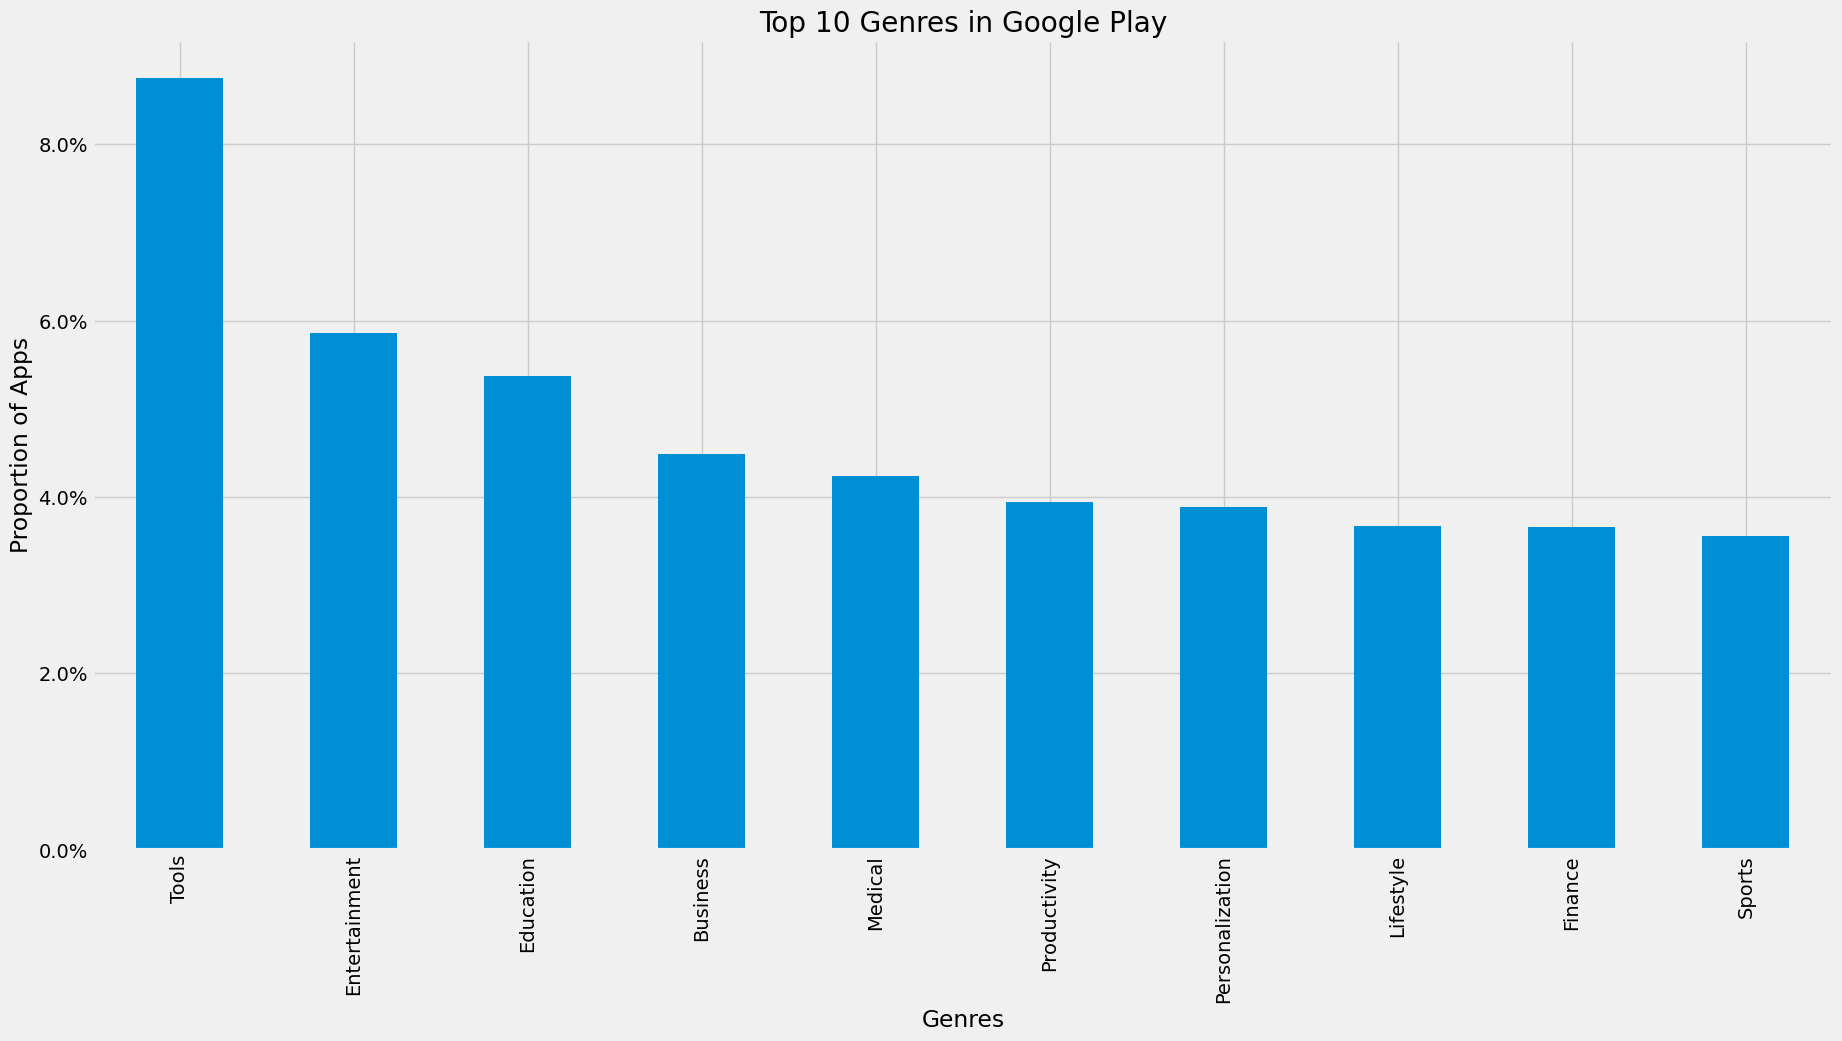

In [80]:

google_genres_counts =df_gp_non_english['Genres'].value_counts(normalize=True)
print(google_genres_counts.shape)
top10_google_genres_categories = google_genres_counts.head(10)
top10_google_genres_categories.plot(kind='bar')
plt.title('Top 10 Genres in Google Play')
plt.ylabel('Proportion of Apps')
plt.xlabel('Genres')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.show()

In [82]:
tools_apps = df_gp_non_english[df_gp_non_english['Genres'] == 'Tools']
tools_apps_sorted = tools_apps.sort_values(by='Installs', ascending=False)
top_10_tools_apps = tools_apps_sorted.head(10)
print(top_10_tools_apps)

                                                    App Category  Rating  \
4005            Clean Master- Space Cleaner & Antivirus    TOOLS     4.7   
7536  Security Master - Antivirus, VPN, AppLock, Boo...    TOOLS     4.7   
3235                                   Google Translate    TOOLS     4.4   
3265                       Gboard - the Google Keyboard    TOOLS     4.2   
3255                         SHAREit - Transfer & Share    TOOLS     4.6   
5463                                              UniFi    TOOLS     4.7   
8167                              What is my IP address    TOOLS     4.5   
6322                             Virtual DJ Sound Mixer    TOOLS     4.2   
9797                                      ES Holo Theme    TOOLS     4.3   
6039  Remote for Samsung TV & BluRay Players (Read D...    TOOLS     3.3   

       Reviews                Size      Installs  Type Price Content Rating  \
4005  42916526  Varies with device  500,000,000+  Free     0       Everyone   
7536 

(23,)


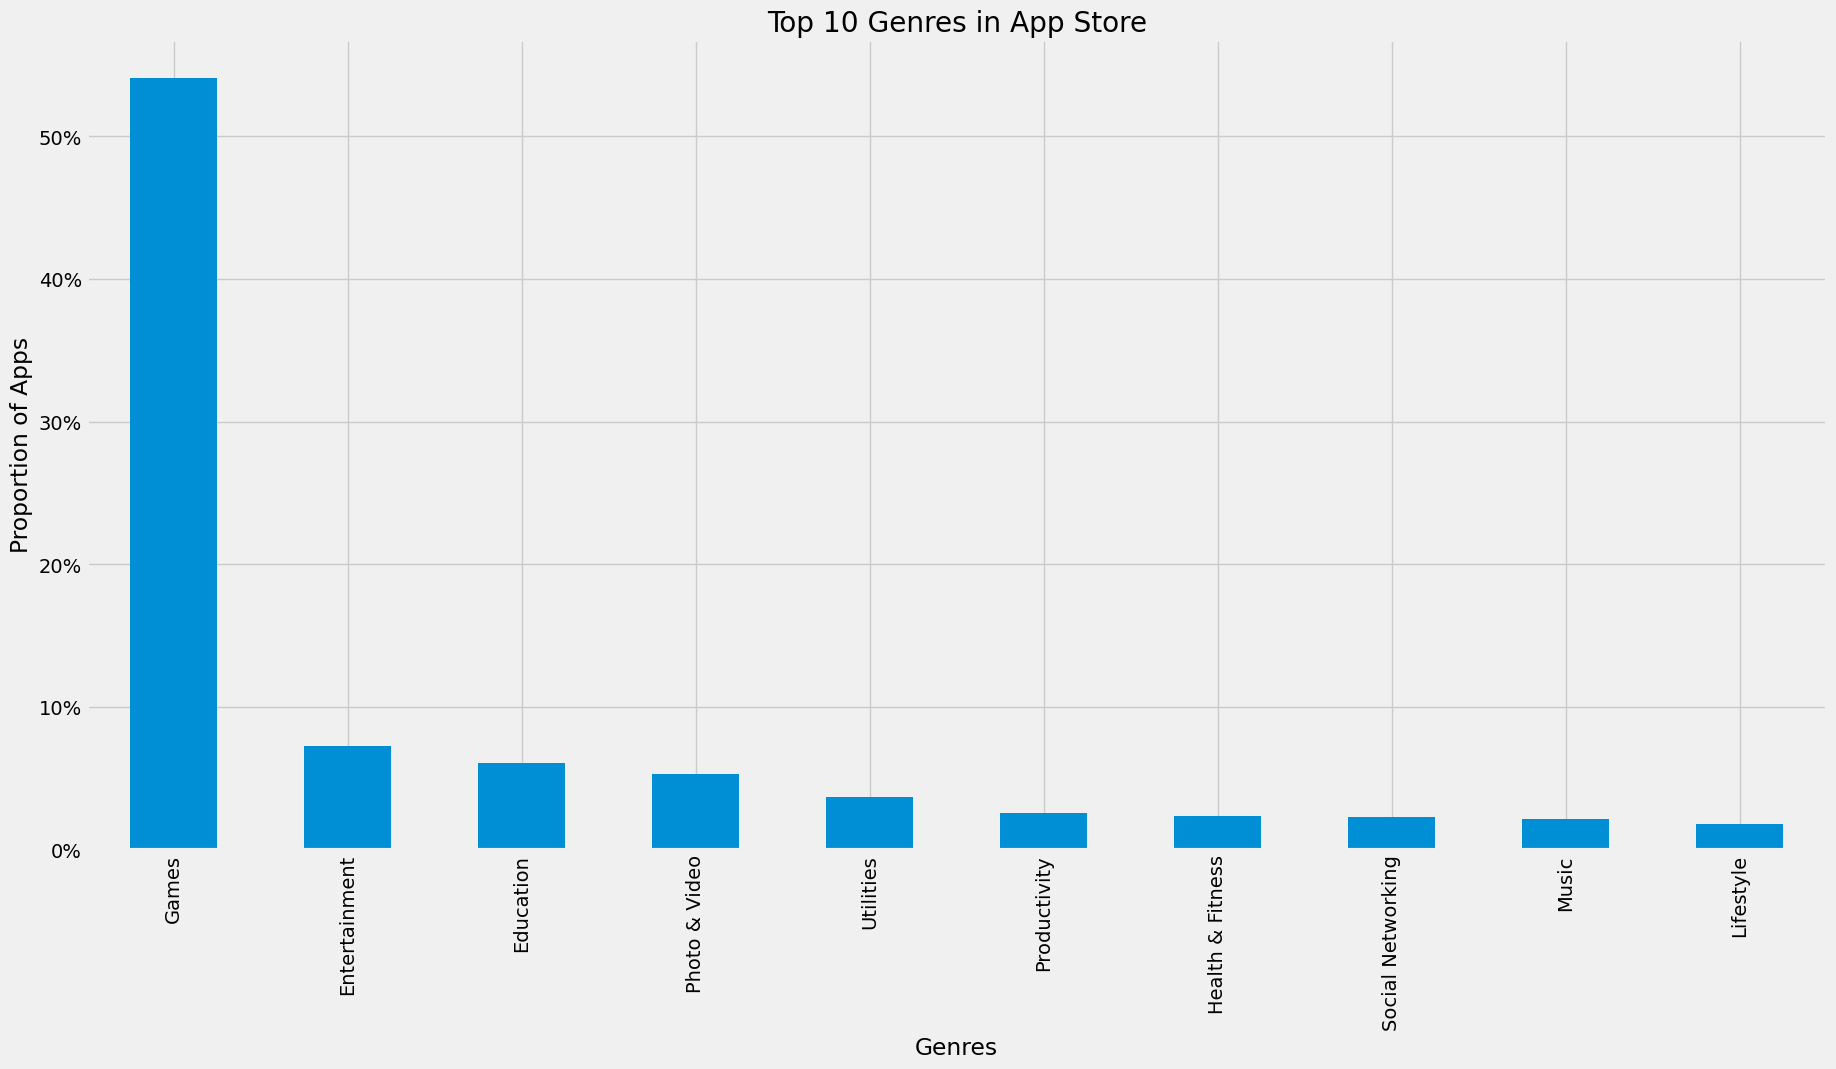

In [83]:
apple_prime_genre_counts =df_as_non_english['prime_genre'].value_counts(normalize=True)
print(apple_prime_genre_counts.shape)
top10_apple_prime_genre_categories = apple_prime_genre_counts.head(10)
top10_apple_prime_genre_categories.plot(kind='bar')
plt.title('Top 10 Genres in App Store')
plt.ylabel('Proportion of Apps')
plt.xlabel('Genres')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.show()


In [84]:
print(df_gp_non_english['Installs'])
print(df_gp_non_english['Installs'].dtype)
print(type(df_gp_non_english['Installs'][0]))

2989    1,000,000+
4970      100,000+
2723    1,000,000+
3079    1,000,000+
3229      500,000+
           ...    
2465            5+
9925           10+
9928           10+
9929           10+
7101          100+
Name: Installs, Length: 9055, dtype: object
object
<class 'str'>


In [85]:
df_numeric = pd.to_numeric(df_gp_non_english['Installs'].str.replace(r'[,+-]', '', regex=True))
print(df_numeric)
print(df_numeric.dtype)

df_gp_non_english.loc[:, 'Installs'] = df_numeric
print(df_gp_non_english.loc[:, 'Installs'])

2989    1000000
4970     100000
2723    1000000
3079    1000000
3229     500000
         ...   
2465          5
9925         10
9928         10
9929         10
7101        100
Name: Installs, Length: 9055, dtype: int64
int64
2989    1000000
4970     100000
2723    1000000
3079    1000000
3229     500000
         ...   
2465          5
9925         10
9928         10
9929         10
7101        100
Name: Installs, Length: 9055, dtype: object


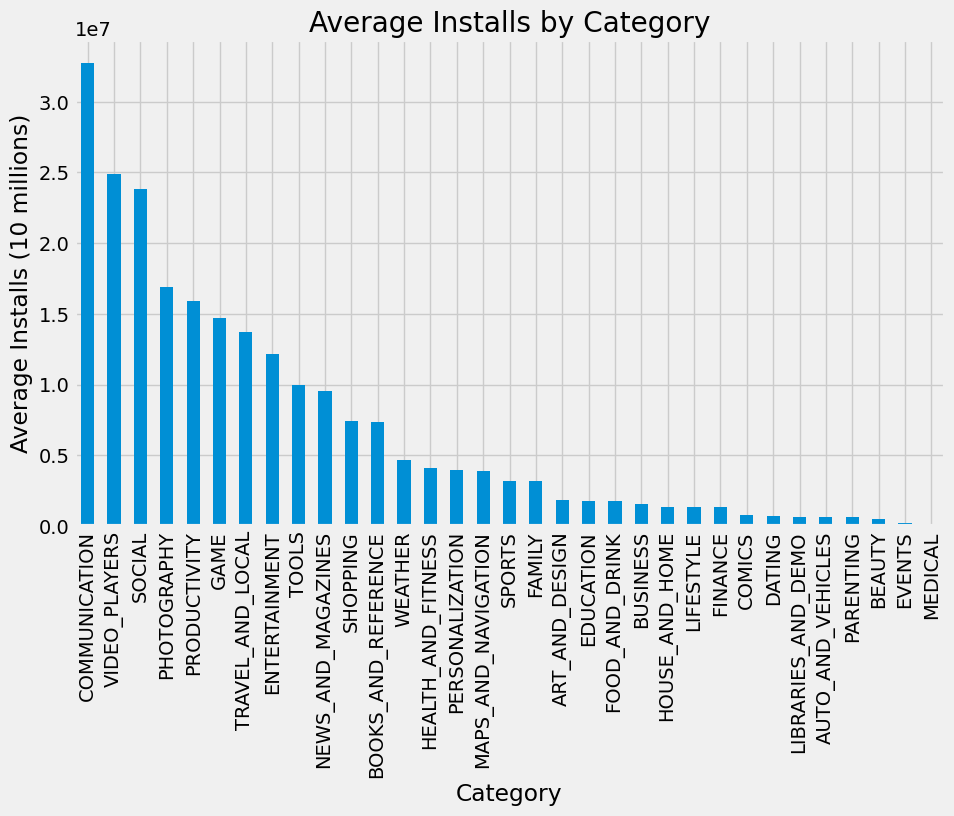

In [86]:
import matplotlib.pyplot as plt
average_installs_by_category =df_gp_non_english.groupby('Category')['Installs'].mean().sort_values(ascending=False)
average_installs_by_category.plot(kind='bar', figsize=(10, 6))
plt.title('Average Installs by Category')
plt.ylabel('Average Installs (10 millions)')
plt.xlabel('Category')
plt.show()

In [87]:
communication_apps = df_gp_non_english[df_gp_non_english['Category'] == 'COMMUNICATION']
communicatio_apps_sorted = family_apps.sort_values(by='Installs', ascending=False)
top_10_communicatio_apps = family_apps_sorted.head(10)
print(top_10_communicatio_apps)

                                                App Category  Rating Reviews  \
4689                             Mod GTA V for MCPE   FAMILY     3.3    4288   
2151                                Toca Life: City   FAMILY     4.7   31100   
2107                    Ninja Dash - Ronin Jump RPG   FAMILY     4.7    8508   
4794                               JW Caleb y Sofia   FAMILY     4.6    5227   
5956                      Survival Mobile:10,000 BC   FAMILY     4.3    7441   
10304                 FD VR Player - for Youtube 3D   FAMILY     4.0    2378   
3891                          Create A Superhero HD   FAMILY     3.3    8642   
4878   Math games for kids : times tables - AB Math   FAMILY     3.9    2371   
7784             Helper for Clash Royale (All-in-1)   FAMILY     4.3    6078   
8773                                     Dr. Sudoku   FAMILY     3.5    2310   

       Size  Installs  Type  Price Content Rating                     Genres  \
4689    10M  500,000+  Free      0     

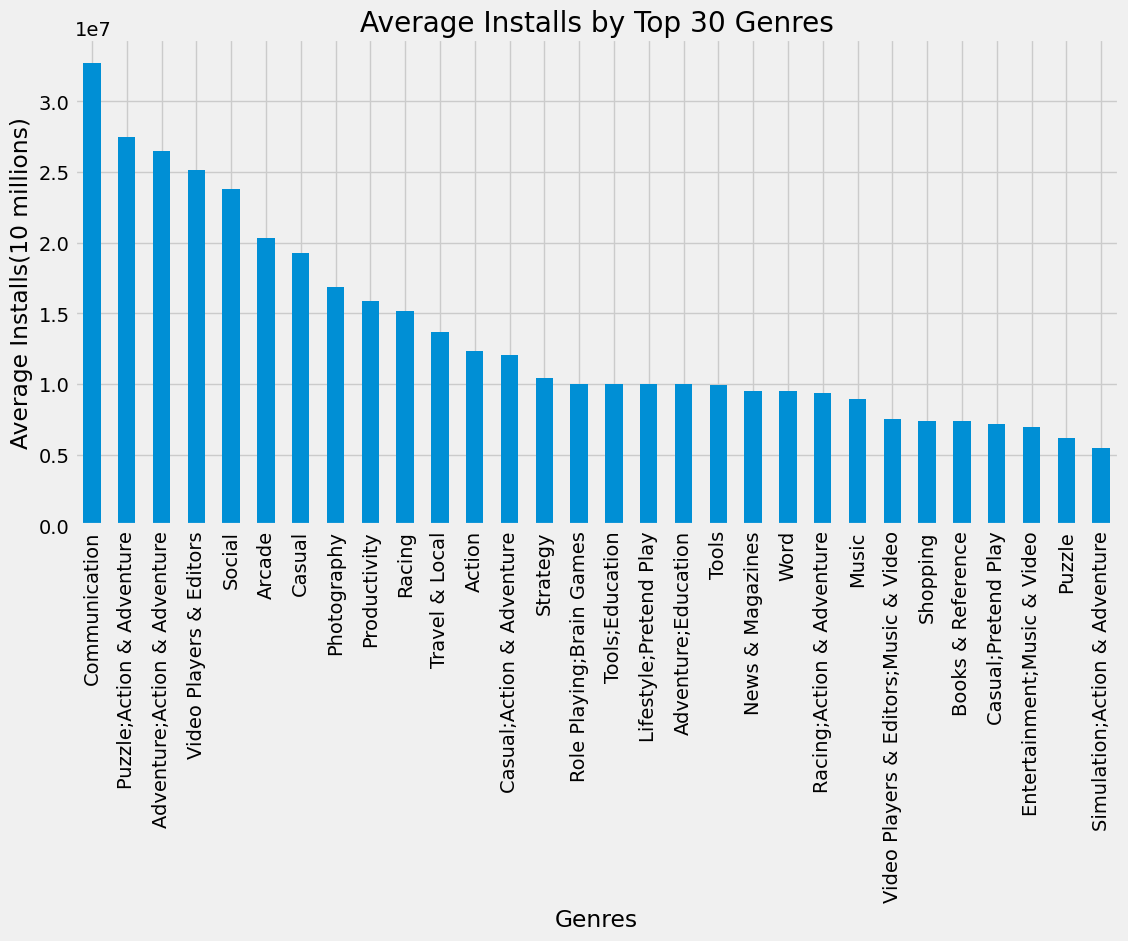

In [88]:
import matplotlib.pyplot as plt
average_installs_by_genre = df_gp_non_english.groupby('Genres')['Installs'].mean().sort_values(ascending=False)
top_30_genres = average_installs_by_genre.head(30)
top_30_genres.plot(kind='bar', figsize=(12, 6))
plt.title('Average Installs by Top 30 Genres')
plt.ylabel('Average Installs(10 millions)')
plt.xlabel('Genres')
plt.show()

In [89]:
print(df_as_non_english['rating_count_tot'].dtype)

int64


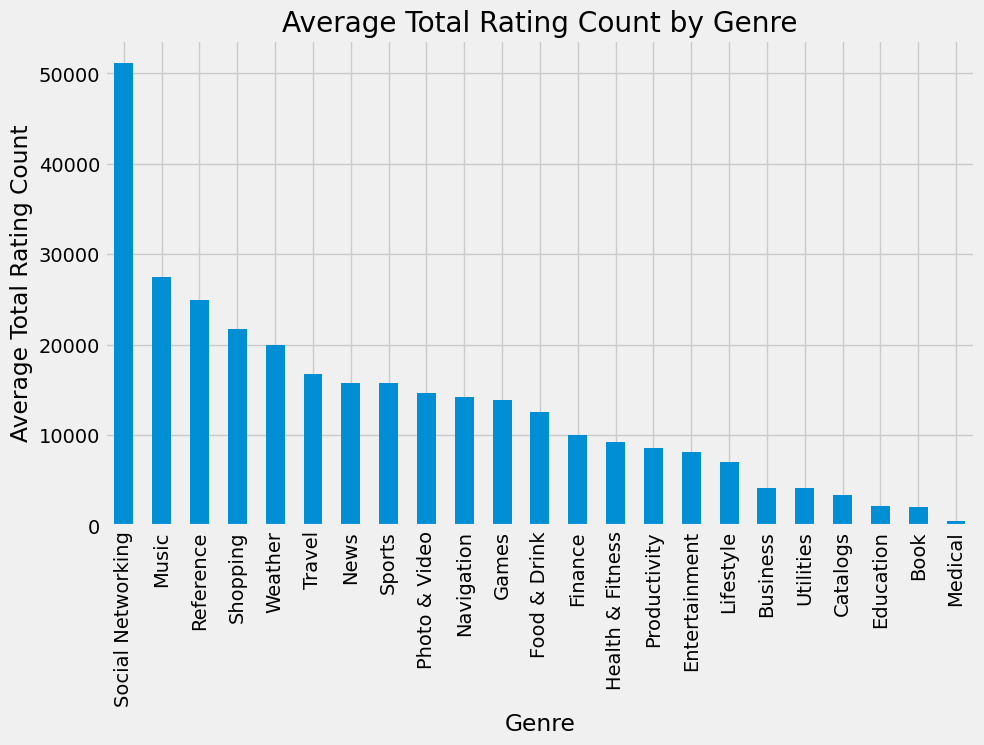

In [90]:
import matplotlib.pyplot as plt
avg_rating_count_tot =df_as_non_english.groupby('prime_genre')['rating_count_tot'].mean().sort_values(ascending=False)
avg_rating_count_tot.plot(kind='bar', figsize=(10, 6))
plt.title('Average Total Rating Count by Genre')
plt.ylabel('Average Total Rating Count')
plt.xlabel('Genre')
plt.show()


In [91]:
reference_apps =df_as_non_english[df_as_non_english['prime_genre'] == 'Reference']
reference_apps_sorted = reference_apps.sort_values(by='rating_count_tot', ascending=False)
top_20_reference_apps = reference_apps_sorted.head(20)
print(top_20_reference_apps)

      Unnamed: 0          id  \
4              5   282935706   
116          130   308750436   
375          424   364740856   
681          779   414706506   
1639        1901   576588894   
503          574   388389451   
6462        9399  1130829481   
587          669   399452287   
1023        1193   475772902   
488          557   385756768   
6567        9625  1135575003   
226          257   334989259   
1580        1834   567008119   
602          688   402422247   
887         1014   450123799   
373          422   364733950   
903         1030   453571750   
20            22   285946052   
1041        1216   478126577   
1908        2218   634158738   

                                             track_name  size_bytes currency  \
4                                                 Bible    92774400      USD   
116               Dictionary.com Dictionary & Thesaurus   111275008      USD   
375      Dictionary.com Dictionary & Thesaurus for iPad   165748736      USD   
681    

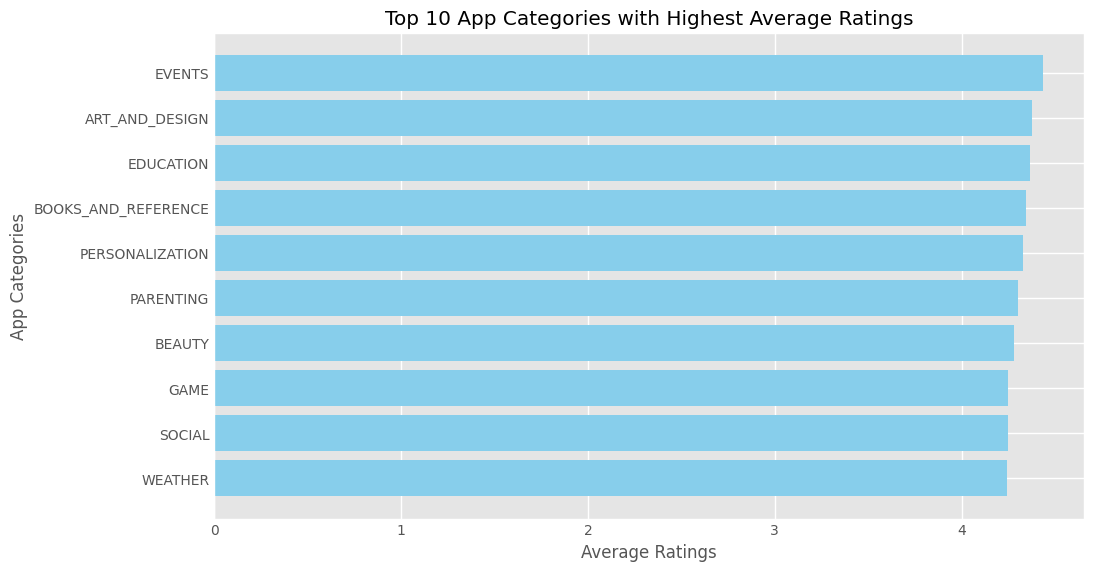

In [103]:
df = playstore.groupby('Category',as_index=False)['Rating'].mean().\
     sort_values(by=['Rating'],ascending = False).head(10)

categories = df['Category'][::-1]
ratings = df['Rating'][::-1]

plt.figure(figsize=(10, 6))
plt.barh(categories, ratings, color='skyblue')

plt.xlabel('Average Ratings')
plt.ylabel('App Categories')
plt.title('Top 10 App Categories with Highest Average Ratings')
plt.show()

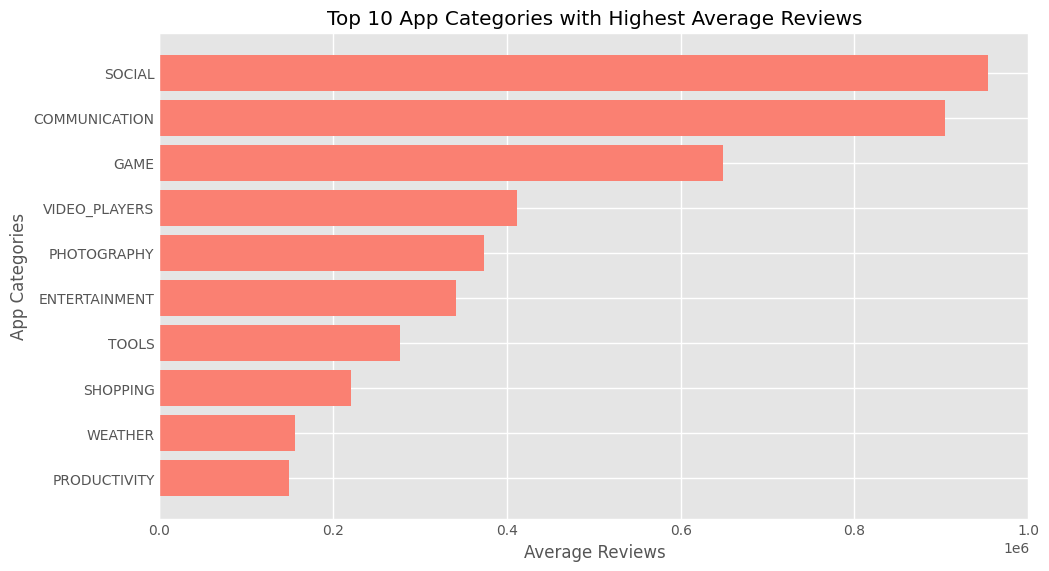

In [104]:
df = playstore.groupby('Category',as_index=False)['Reviews'].mean().\
     sort_values(by='Reviews',ascending = False).head(10)

categories = df['Category'][::-1]
reviews = df['Reviews'][::-1]

plt.figure(figsize=(10, 6))
plt.barh(categories, reviews, color='salmon')
plt.xlabel('Average Reviews')
plt.ylabel('App Categories')
plt.title('Top 10 App Categories with Highest Average Reviews')
plt.show()

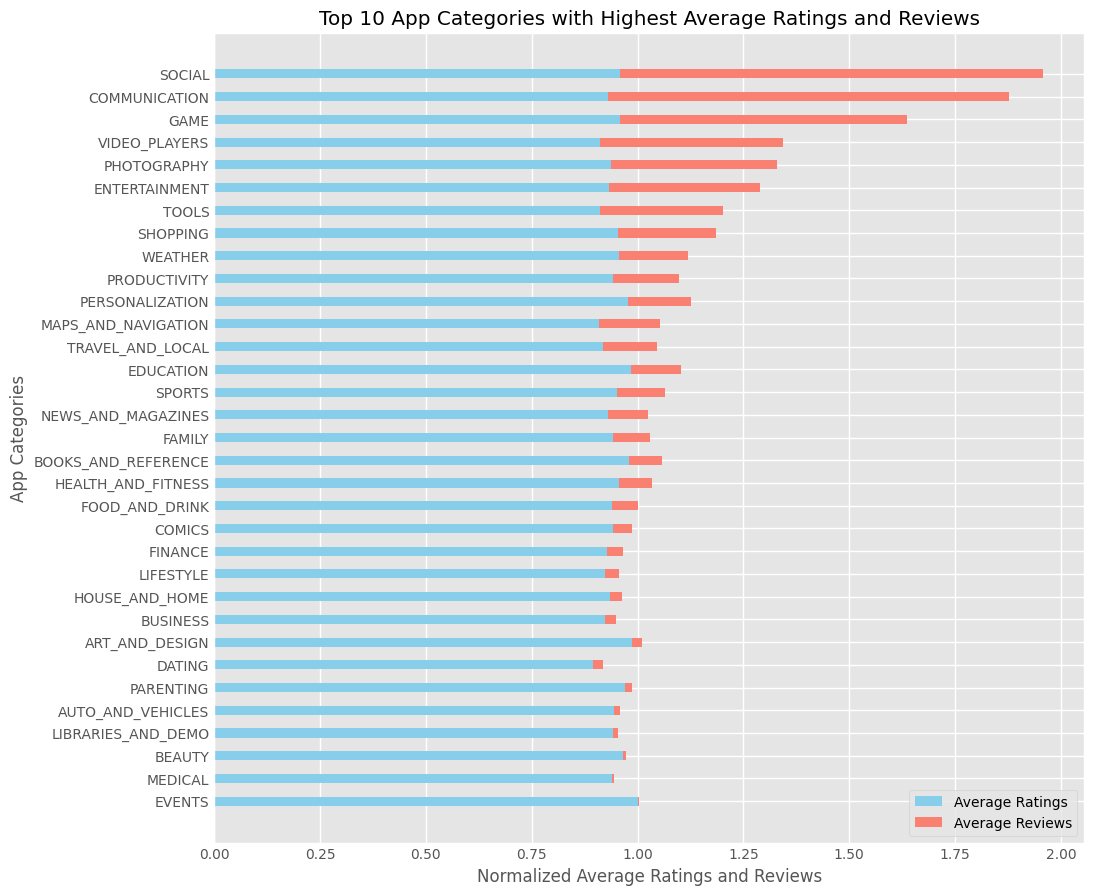

In [105]:
df = playstore.groupby('Category',as_index=False)[['Rating','Reviews']].mean().\
sort_values(by=['Reviews','Rating'],ascending = False)

categories = df['Category'][::-1]
ratings = df['Rating'][::-1]
reviews = df['Reviews'][::-1]
ratings_norm = ratings / np.max(ratings)
reviews_norm = reviews / np.max(reviews)
plt.figure(figsize=(10, 10))
bar_width = 0.4
index = np.arange(len(categories))


plt.barh(index, ratings_norm, bar_width, color='skyblue', label='Average Ratings')
plt.barh(index, reviews_norm, bar_width, color='salmon', label='Average Reviews', left=ratings_norm)

plt.xlabel('Normalized Average Ratings and Reviews')
plt.ylabel('App Categories')
plt.title('Top 10 App Categories with Highest Average Ratings and Reviews')
plt.yticks(index, categories)
plt.legend()

plt.show()


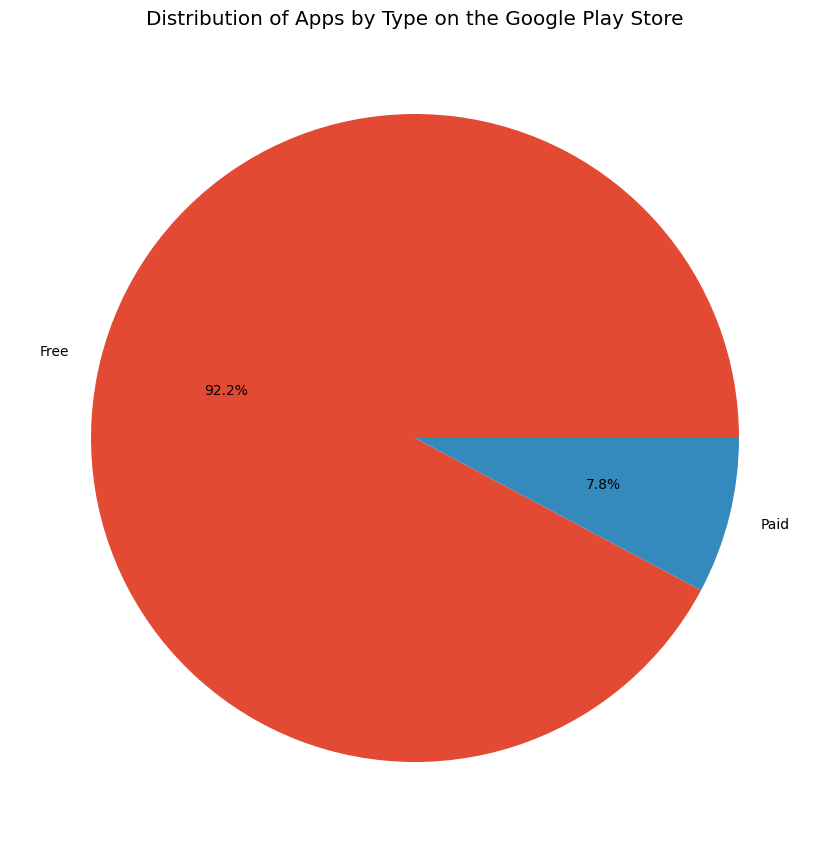

In [106]:
result = playstore.groupby('Type')['App'].count()
label = result.index
plt.pie(result, labels=label , autopct='%1.1f%%')
plt.title('Distribution of Apps by Type on the Google Play Store')
plt.show()

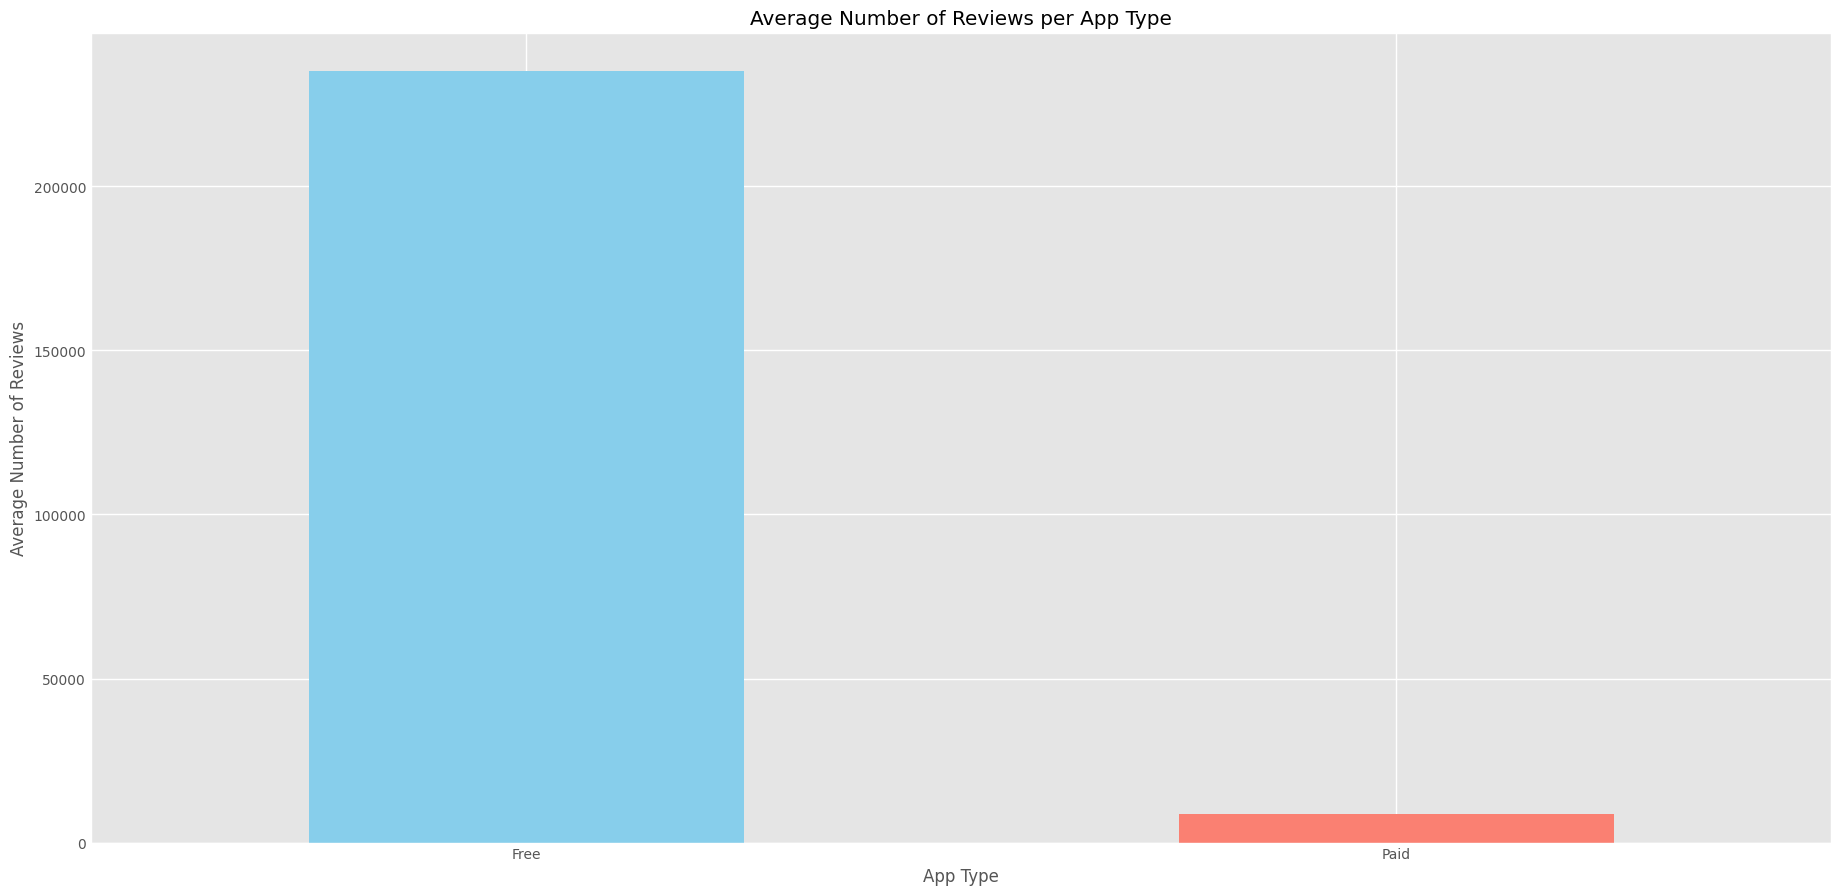

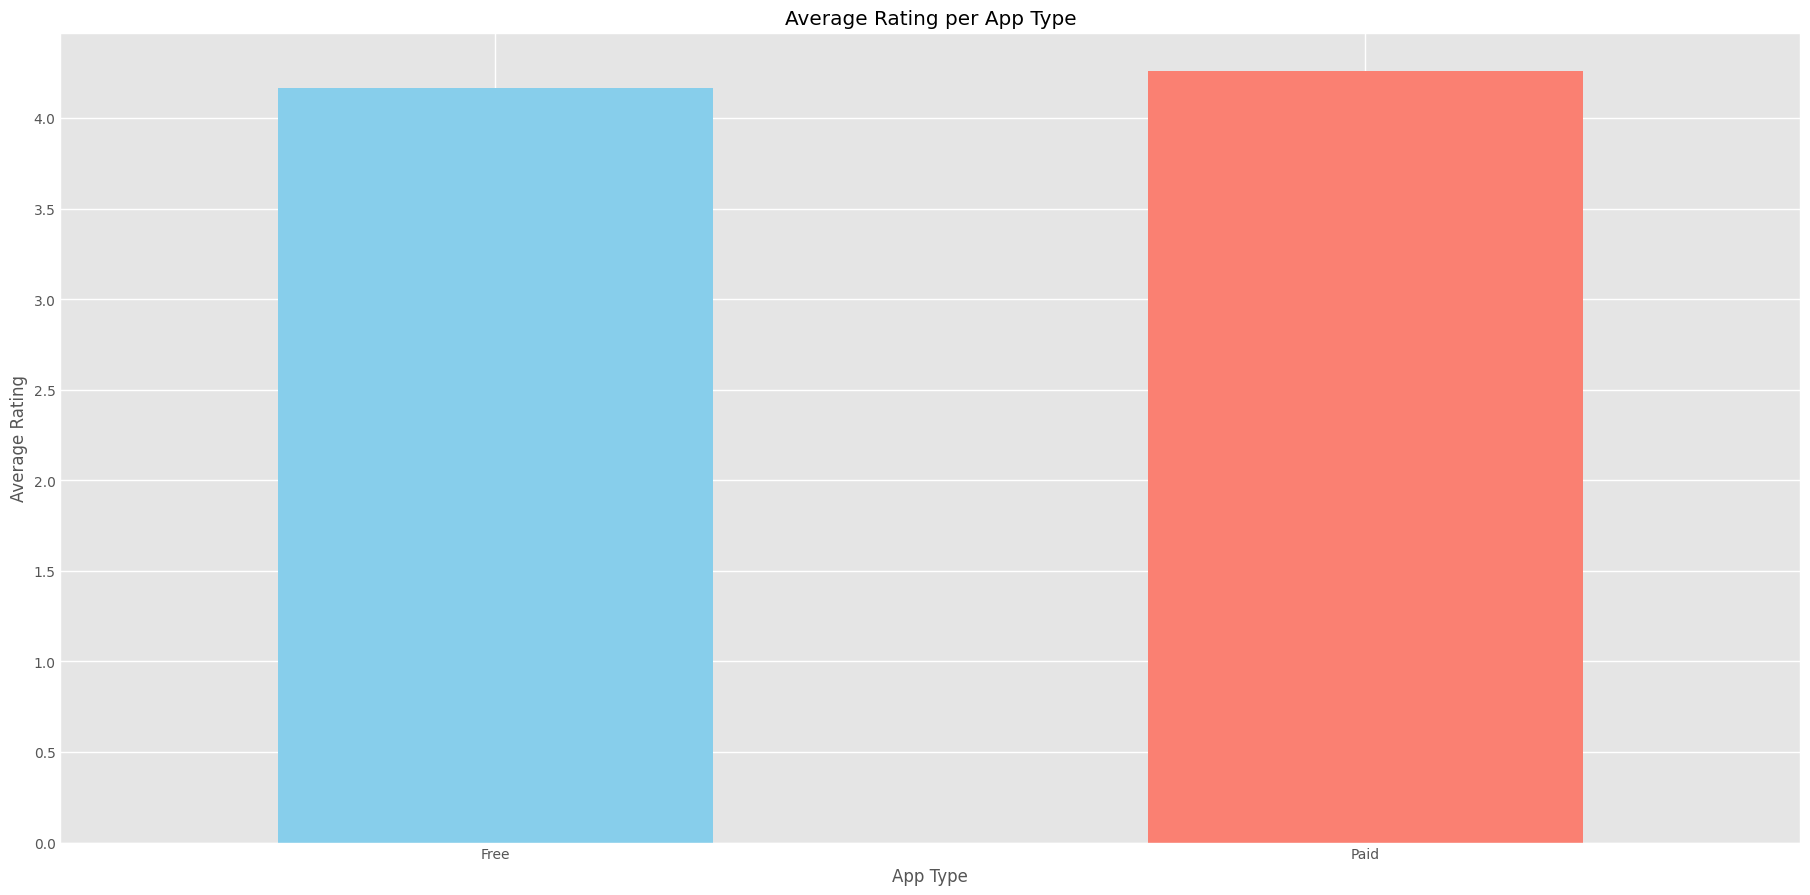

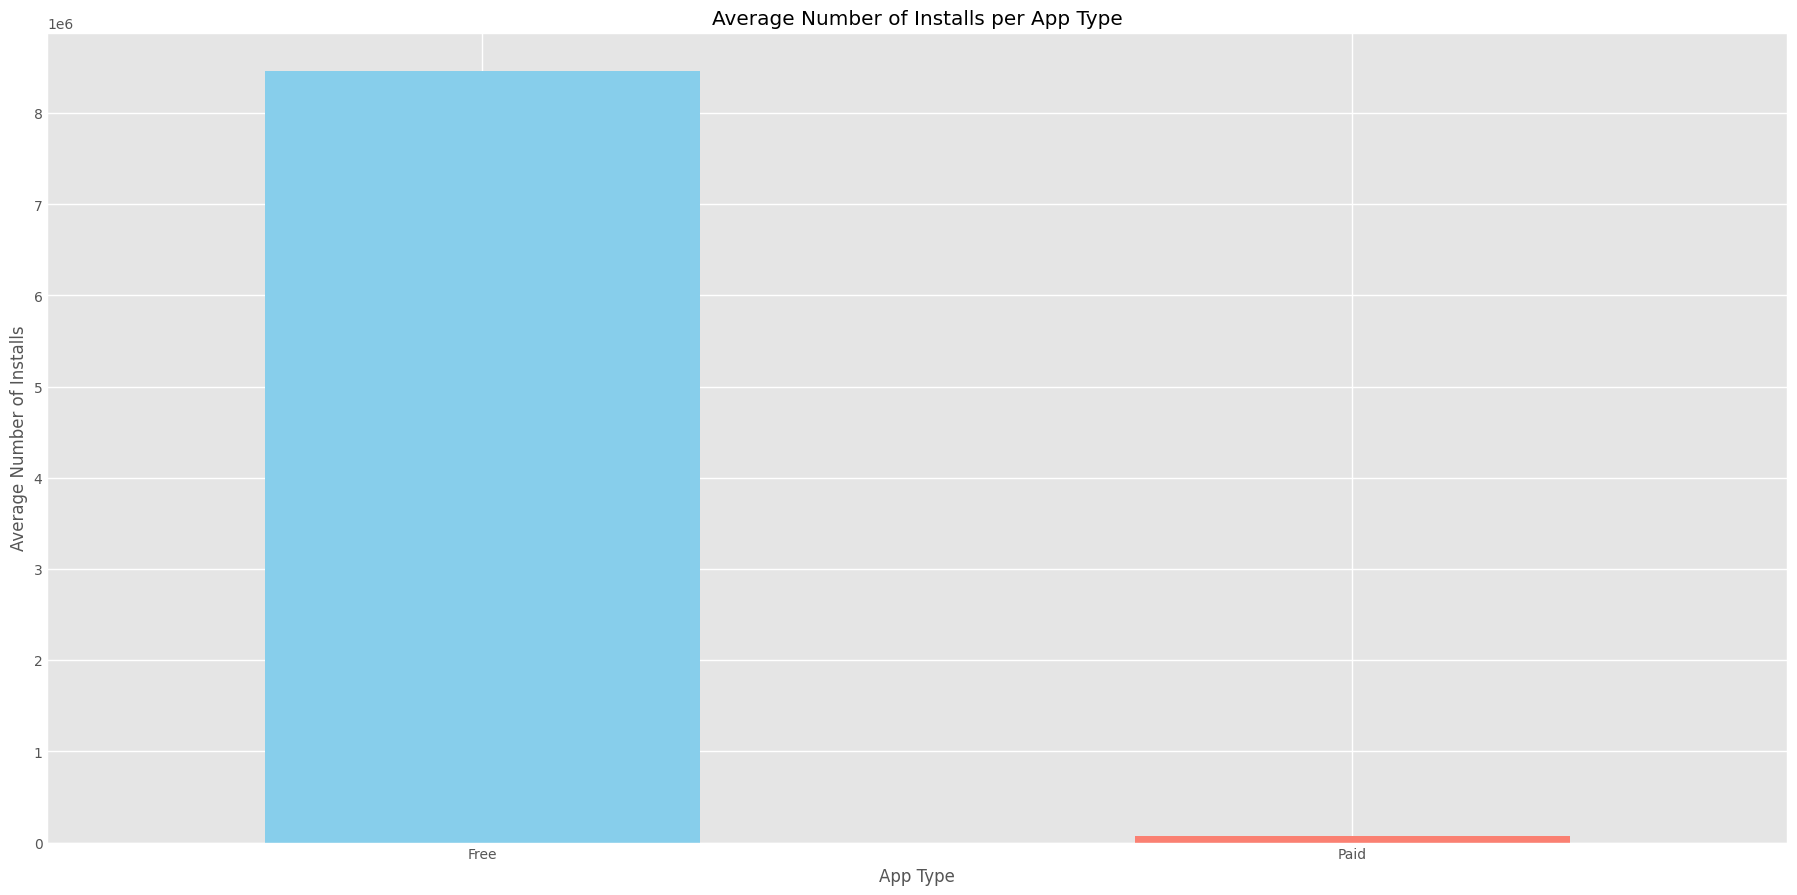

In [107]:
result = playstore.groupby('Type')['Reviews'].mean()
result.plot.bar(color=['skyblue', 'salmon'])
plt.title('Average Number of Reviews per App Type')
plt.xlabel('App Type')
plt.ylabel('Average Number of Reviews')
plt.xticks(rotation=0)  
plt.show()

result = playstore.groupby('Type')['Rating'].mean()
result.plot.bar(color=['skyblue', 'salmon'])
plt.title('Average Rating per App Type')
plt.xlabel('App Type')
plt.ylabel('Average Rating')
plt.xticks(rotation=0) 
plt.show()
result = playstore.groupby('Type')['Installs'].mean()
result.plot.bar(color=['skyblue', 'salmon'])
plt.title('Average Number of Installs per App Type')
plt.xlabel('App Type')
plt.ylabel('Average Number of Installs')
plt.xticks(rotation=0) 
plt.show()

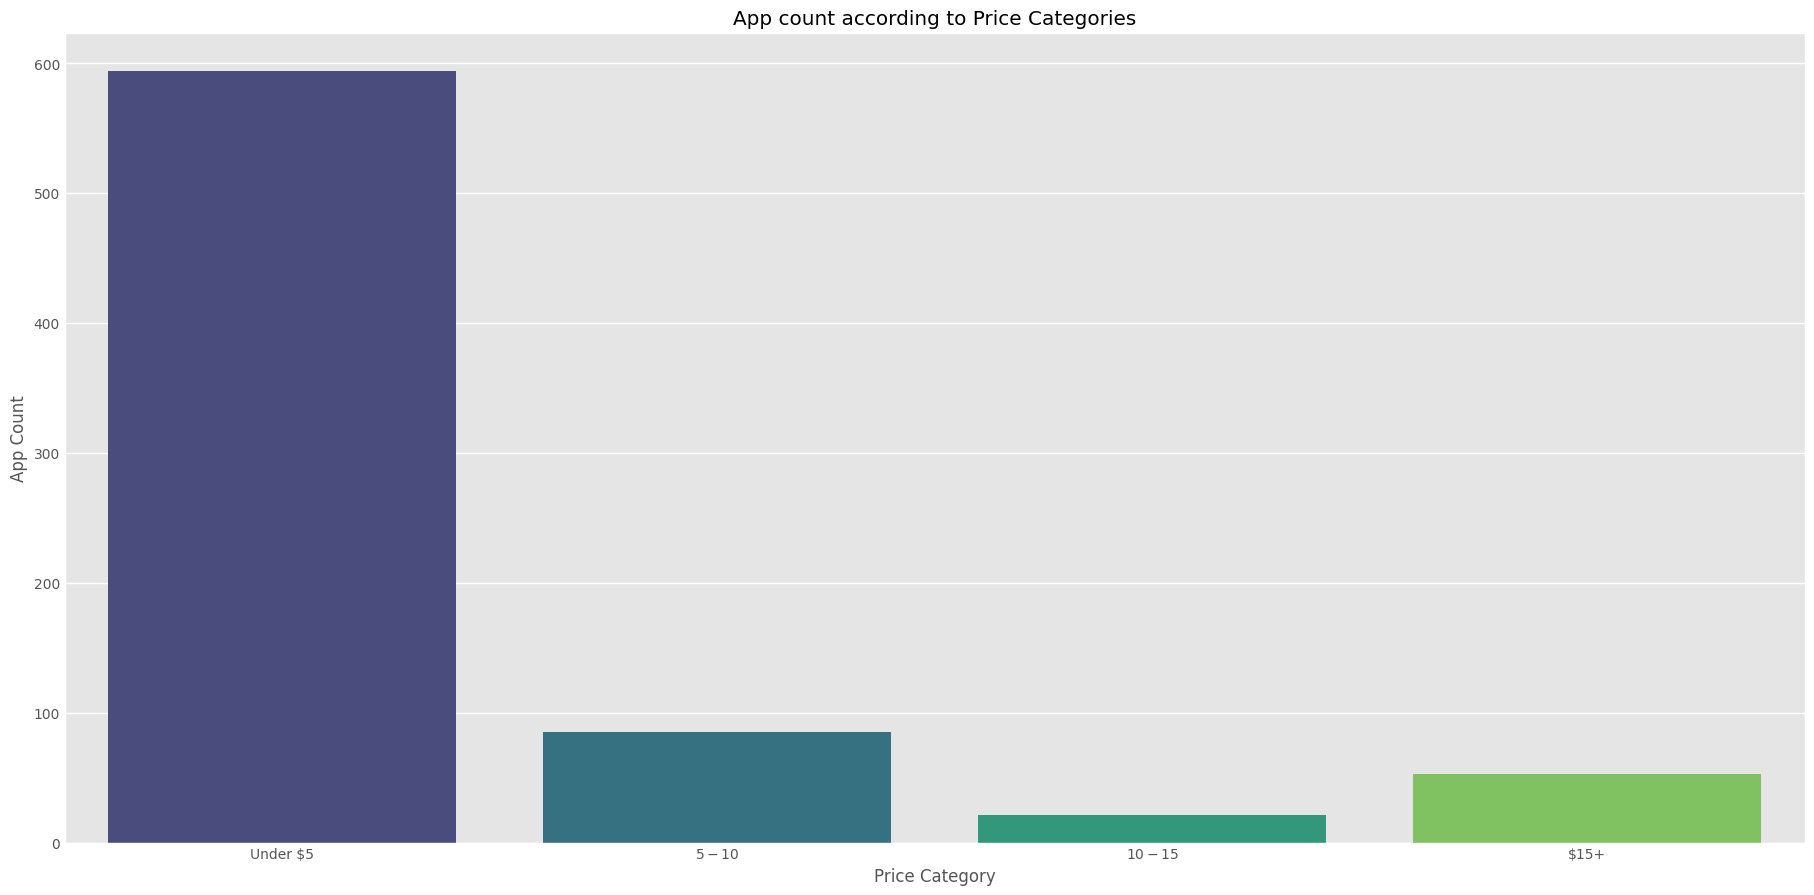

In [108]:
df = playstore[playstore['Type'] == 'Paid']

bins = [-float('inf'), 5, 10, 15, float('inf')]
labels = ['Under $5', '$5-$10', '$10-$15', '$15+']

df['Price Category'] =  pd.cut(df['Price'], bins=bins, labels=labels)

result = df['Price Category'].value_counts() 

sns.barplot(x=result.index, y=result.values, palette='viridis')

plt.ylabel('App Count')
plt.title('App count according to Price Categories')
plt.show()

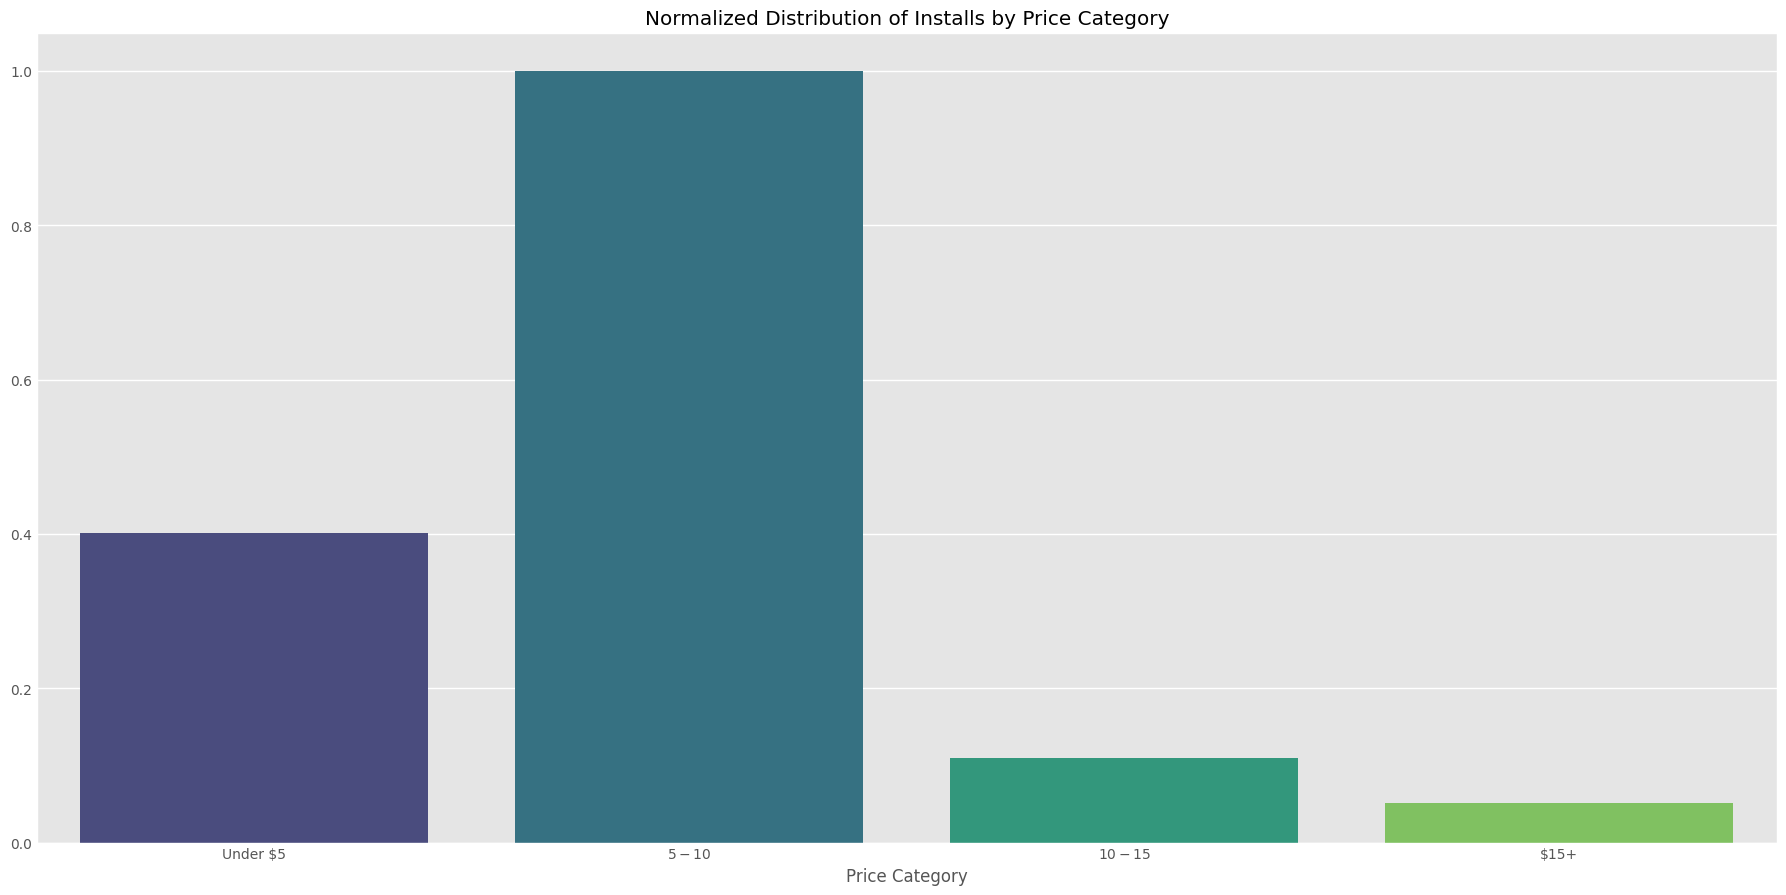

In [109]:
result = df.groupby('Price Category')['Installs'].mean()
result = result/result.max()
sns.barplot(x=result.index, y=result.values, palette='viridis')
plt.title('Normalized Distribution of Installs by Price Category')
plt.show()

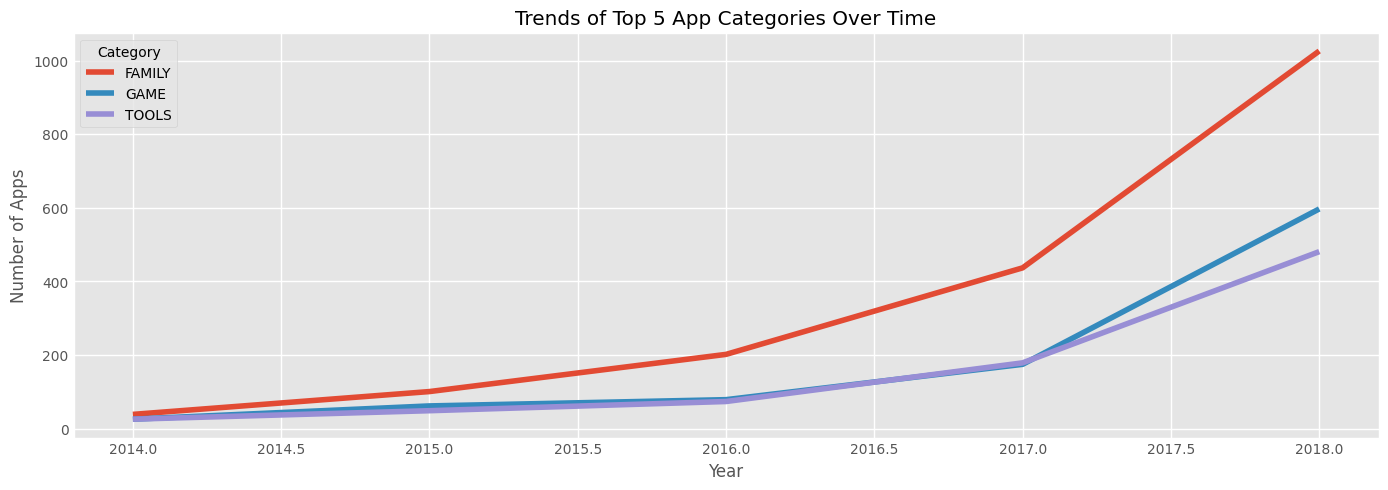

In [110]:
df = playstore.copy()
df = df[['Category', 'Last Updated', 'Genres']]

df['Year'] = df['Last Updated'].dt.year

result = df[df['Year'] >= 2014].groupby(['Category', 'Year'], as_index=False)['Genres'].count()

category_totals = result.groupby('Category')['Genres'].sum()


top_categories = category_totals.nlargest(3).index

filtered_result = result[result['Category'].isin(top_categories)]

# Plot the data
plt.figure(figsize=(15, 5))
sns.lineplot(data=filtered_result, x='Year', y='Genres', hue='Category')
plt.title('Trends of Top 5 App Categories Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Apps')
plt.legend(title='Category')
plt.show()

array([<Axes: ylabel='0'>], dtype=object)

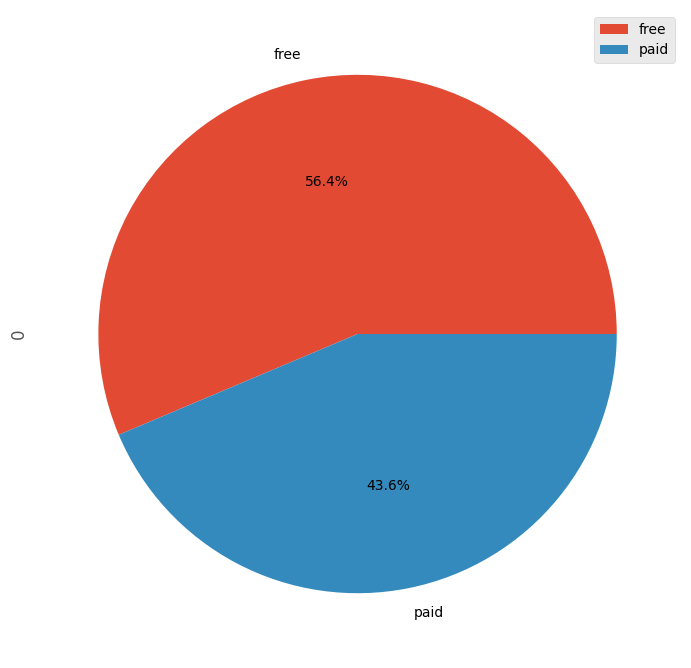

In [116]:
app_pricedf= pd.DataFrame( [len(freeapps),len(paidapps)] , index=['free','paid'])
app_pricedf.plot(kind='pie', subplots=True, figsize=(16,8), autopct='%1.1f%%')

In [117]:
def genreFree(gen):
    return len(apps[(apps['price'] == 0.0) & (apps['prime_genre']== gen)])

In [118]:
def genrePaid(gen):
    return len(apps[(apps['price'] != 0.0) & (apps['prime_genre']== gen)])

In [119]:
genre_list = list()
genreFree_list = list()
genrePaid_list = list()
genreTotal_list = list()

In [120]:
for gen in genres:  
    free_gen = genreFree(gen)
    paid_gen = genrePaid(gen)
    totalapp_gen = free_gen + paid_gen
    genre_list.append(gen)
    genreFree_list.append(free_gen)
    genrePaid_list.append(paid_gen)
    genreTotal_list.append(totalapp_gen)

In [121]:
genre_df = pd.DataFrame({
    "genre_name" : genre_list,
    "genre_freeApp" : genreFree_list,
    "genre_paidApp" : genrePaid_list,
    "genre_totalApp" : genreTotal_list
},columns=['genre_name','genre_freeApp','genre_paidApp','genre_totalApp'])

#sorting into descending order
genre_df.sort_values('genre_totalApp', ascending=False, inplace=True)

genre_df.head(10)

,genre_name,genre_freeApp,genre_paidApp,genre_totalApp
0,Games,2257,1605,3862
13,Entertainment,334,201,535
16,Education,132,321,453
14,Photo & Video,167,182,349
7,Utilities,109,139,248
12,Health & Fitness,76,104,180
1,Productivity,62,116,178
9,Social Networking,143,24,167
17,Lifestyle,94,50,144
6,Music,67,71,138


In [122]:
genre_df.drop_duplicates('genre_name',keep= False,inplace=True)
genre_df.head()

,genre_name,genre_freeApp,genre_paidApp,genre_totalApp
0,Games,2257,1605,3862
13,Entertainment,334,201,535
16,Education,132,321,453
14,Photo & Video,167,182,349
7,Utilities,109,139,248


In [123]:
def groupedGraph(start,end):
    
    barWidth = 0.20

    
    bars1 = genre_df['genre_freeApp'][start:end]
    bars2 = genre_df['genre_paidApp'][start:end]
    bars3 = genre_df['genre_totalApp'][start:end]

    
    r1 = np.arange(bars1.size)
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]

    
    plt.bar(r1, bars1, color='#36688D', width=barWidth, edgecolor='white', label='Free apps')
    plt.bar(r2, bars2, color='#F3CD05', width=barWidth, edgecolor='white', label='Paid apps')
    plt.bar(r3, bars3, color='#F49F05', width=barWidth, edgecolor='white', label='Total apps')

    
    plt.xticks([r + barWidth for r in range(len(bars1))], genre_df['genre_name'][start:end])

    plt.legend()


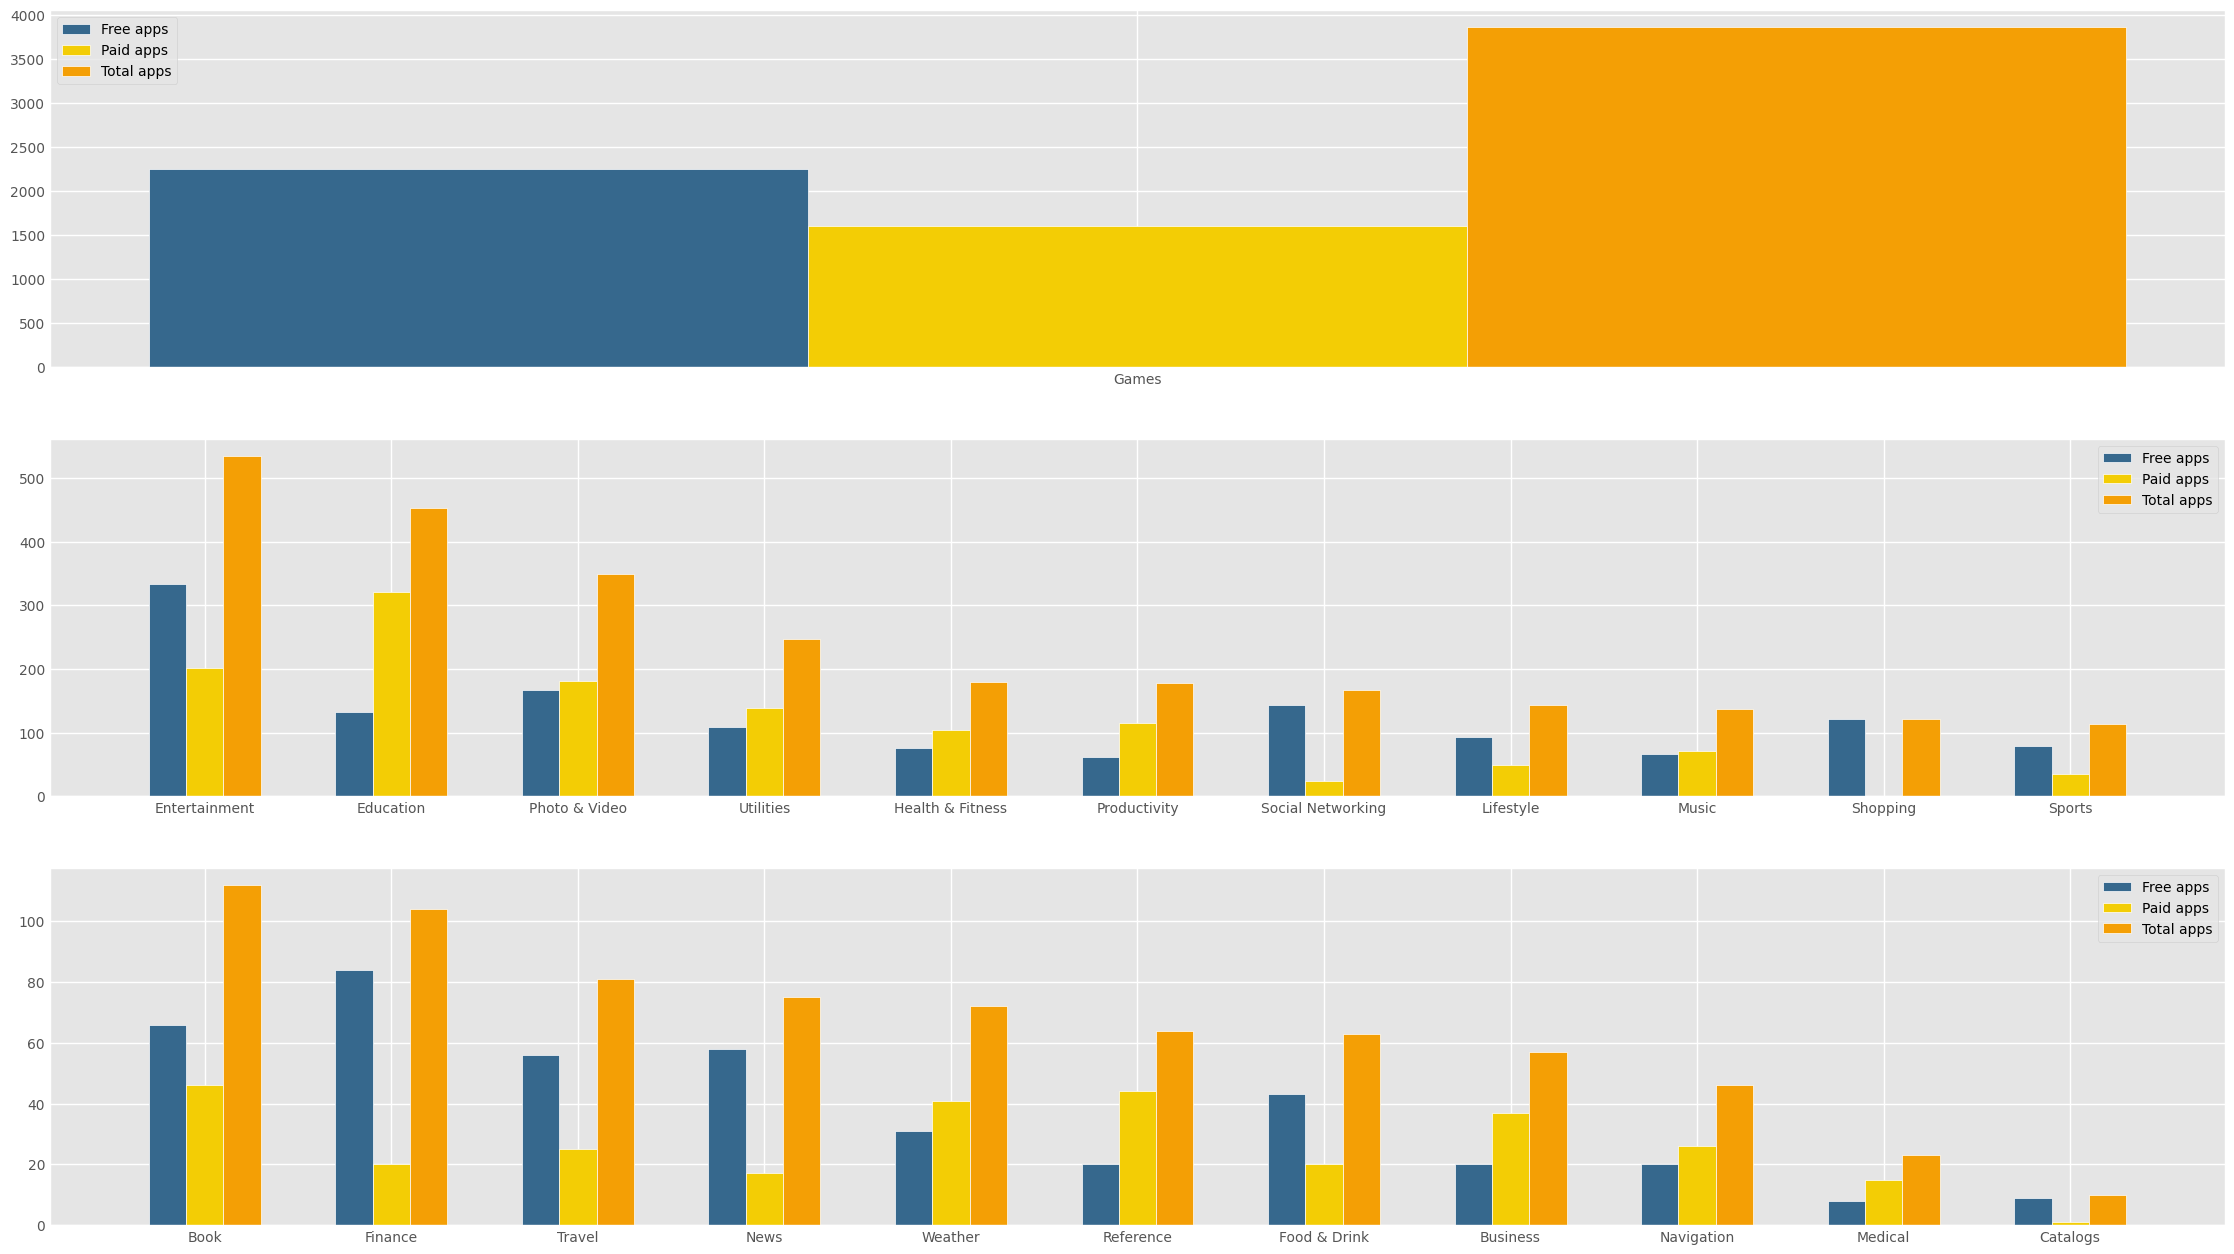

In [124]:
fig = plt.figure(figsize=(25,15))

plt.subplot(311)
groupedGraph(0,1)

plt.subplot(312)
groupedGraph(1,12)

plt.subplot(313)
groupedGraph(12,23)

In [125]:
free_highratingapp = list()
paid_highratingapp = list()
total_highratingapp = list()

In [128]:
popular_apps = apps.sort_values(['user_rating','rating_count_tot'], ascending=False)

In [129]:
ratingapp = popular_apps[(popular_apps['user_rating'] == 4.0) | (popular_apps['user_rating'] == 5.0) | (popular_apps['user_rating']==4.5)]
ratingapp.head(5)

,Unnamed: 0,id,track_name,size_mb,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
1104,1289,487119327,Head Soccer,121.319424,USD,0.00,481564,8518,5.0,5.0,5.4.1,4+,Games,40,4,11,1
302,341,350642635,Plants vs. Zombies,105.379840,USD,0.99,426463,680,5.0,4.0,1.9.13,9+,Games,38,0,5,1
3086,3694,930574573,Sniper 3D Assassin: Shoot to Kill Gun Game,157.851648,USD,0.00,386521,10332,5.0,5.0,1.17.6,17+,Games,40,5,9,1
2177,2537,698255242,Geometry Dash Lite,69.076992,USD,0.00,370370,2650,5.0,4.5,2.11,4+,Games,37,4,1,1
498,568,387428400,Infinity Blade,624.107810,USD,0.99,326482,177050,5.0,5.0,1.4.1,12+,Games,43,5,13,1


In [131]:
free_ratingapp = ratingapp[ratingapp['price'] == 0.0]

paid_ratingapp = ratingapp[ratingapp['price'] != 0.0]

print("All higher rating applications :", len(ratingapp))
print("Free higher rating applications : ",len(free_ratingapp))
print("Paid higher rating applications : ",len(paid_ratingapp))

All higher rating applications : 4781
Free higher rating applications :  2570
Paid higher rating applications :  2211


In [132]:
for g in ratingapp['prime_genre'].unique():
    free_highratingapp.append(len(free_ratingapp[free_ratingapp['prime_genre']== g]))
    paid_highratingapp.append(len(paid_ratingapp[paid_ratingapp['prime_genre']== g]))
    total_highratingapp.append(len(free_ratingapp[free_ratingapp['prime_genre']== g]) + len(paid_ratingapp[paid_ratingapp['prime_genre']== g]))

In [134]:
rating_df = pd.DataFrame({
    'genre' : genre_list,
    'free_higherRating' : free_highratingapp,
    'paid_higherRating' : paid_highratingapp,
    'total_higherRating' : total_highratingapp
},columns=['genre','free_higherRating','paid_higherRating','total_higherRating'])

rating_df.sort_values('total_higherRating',ascending =False, inplace=True)
rating_df.head()

,genre,free_higherRating,paid_higherRating,total_higherRating
0,Games,1625,1243,2868
8,Travel,76,189,265
13,Entertainment,154,107,261
3,Shopping,122,133,255
15,Navigation,53,91,144


In [135]:
rating_df.drop_duplicates('genre',keep=False,inplace=True)

Text(0.5, 1.0, 'Top 10 Paid popular applications genres')

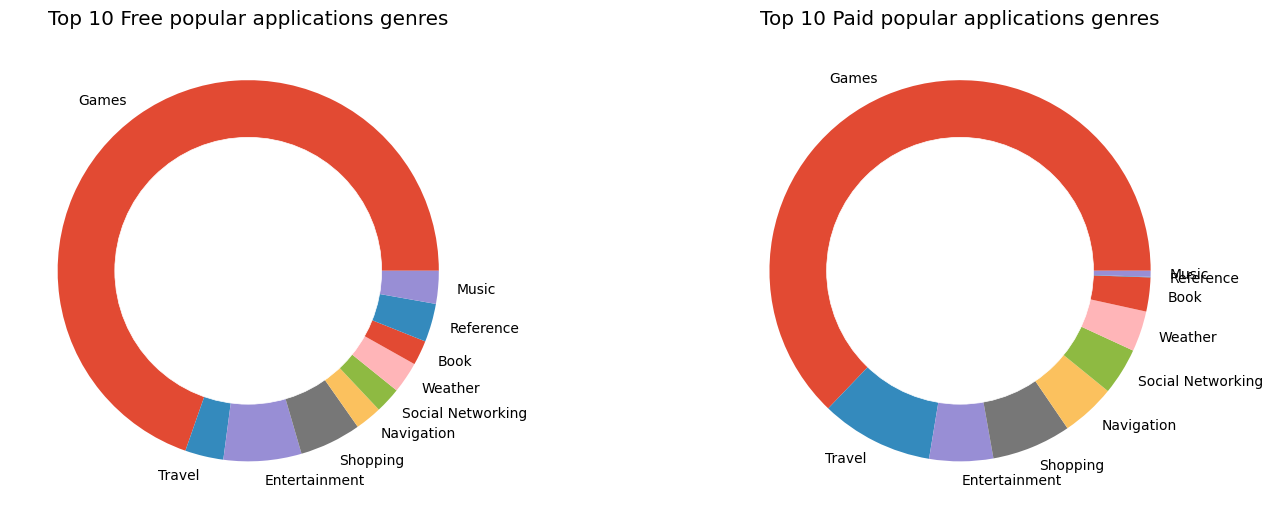

In [136]:
fig = plt.figure(figsize=(15,20))

plt.subplot(321)

circle=plt.Circle( (0,0), 0.7, color='white')

plt.pie(rating_df['free_higherRating'][0:10], labels= rating_df['genre'][0:10])
p=plt.gcf()
p.gca().add_artist(circle)
plt.title("Top 10 Free popular applications genres")

plt.subplot(322)

circle=plt.Circle( (0,0), 0.7, color='white')

plt.pie(rating_df['paid_higherRating'][0:10], labels= rating_df['genre'][0:10])
p=plt.gcf()
p.gca().add_artist(circle)
plt.title("Top 10 Paid popular applications genres")

In [139]:
apps.sort_values(["sup_devices.num","user_rating"],ascending=False).head()

,Unnamed: 0,id,track_name,size_mb,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
605,691,403090531,Dungeon Raid,11.911065,USD,0.99,4401,2927,5.0,5.0,1.3.4,9+,Games,47,0,1,0
613,699,404553553,Bloons TD 4,23.447492,USD,2.99,8304,1401,4.5,4.5,3.6.1,4+,Games,47,0,1,1
768,877,430920838,Tikal,27.049083,USD,2.99,626,435,4.5,4.5,1.2,4+,Games,47,5,1,1
1003,1159,471458190,Reiner Knizia's Tigris & Euphrates,54.852324,USD,4.99,1777,321,4.5,4.5,2.0.1,4+,Games,47,5,1,1
1012,1176,473596157,Haunted Halloween Escape,15.481361,USD,0.00,11945,11863,4.5,4.5,1.1,12+,Games,47,5,0,1


In [140]:
sup_devices_apps = pd.DataFrame({
    'number_of_devices' :apps["sup_devices.num"].value_counts().index,
    'total_number_of_apps' : apps["sup_devices.num"].value_counts()
},columns=['number_of_devices','total_number_of_apps'])

sup_devices_apps.head()

,number_of_devices,total_number_of_apps
sup_devices.num,,
37,37,3263
38,38,1912
40,40,1142
43,43,371
24,24,270


In [141]:
def sup_device_genre(genre):
    genre_apps = apps.groupby("prime_genre").get_group(genre)
    return pd.DataFrame({
              genre : genre_apps["sup_devices.num"].value_counts(),
                },columns=[genre])

In [142]:
for g in genres:
    sup_devices_apps[g] = sup_device_genre(g)
  
    
sup_devices_apps.fillna(0, inplace=True)
sup_devices_apps.sort_values('number_of_devices', ascending= False, inplace=True)
sup_devices_apps.head()

,number_of_devices,total_number_of_apps,Games,Productivity,Weather,Shopping,Reference,Finance,Music,Utilities,...,Entertainment,Photo & Video,Navigation,Education,Lifestyle,Food & Drink,News,Book,Medical,Catalogs
sup_devices.num,,,,,,,,,,,,,,,,,,,,,
47,47,26,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
45,45,8,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43,43,371,298.0,3.0,2.0,0.0,1.0,2.0,5.0,2.0,...,20.0,6.0,0.0,15.0,3.0,0.0,0.0,1.0,1.0,0.0
40,40,1142,910.0,4.0,5.0,1.0,5.0,4.0,2.0,16.0,...,43.0,17.0,2.0,88.0,4.0,3.0,2.0,13.0,1.0,0.0
39,39,40,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0
